In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
clicks = pd.read_csv("data/clicks.csv", dtype={'advertiser_id': 'category', 'action_id': 'float64', 'source_id': 'category',
                                               'created': 'str', 'country_code':'category', 'latitude': 'float64',
                                               'longitude':'float64', 'wifi_connection':'bool' , 'carrier_id':np.float16,
                                               'trans_id':'str', 'os_minor':'float64', 'agent_device':'float64', 'os_major':'float64',
                                               'specs_brand':'int64', 'brand':'category', 'timeToClick':'float64',
                                               'touchX':'float64', 'touchY':'float64', 'ref_type':'category', 'ref_hash':'int64'}, parse_dates = ['created'])
clicks.drop('action_id', axis=1, inplace = True)
clicks.drop('wifi_connection', axis=1, inplace = True) #false
clicks['day'] = clicks['created'].dt.date
clicks['hour'] = clicks['created'].dt.hour
clicks.head(5)

advertiser_id source_id                 created         country_code  \
0             2         4 2019-03-06 22:42:12.755  6333597102633388268   
1             0         0 2019-03-08 10:24:30.641  6333597102633388268   
2             0         0 2019-03-08 15:24:16.069  6333597102633388268   
3             2         3 2019-03-06 03:08:51.543  6333597102633388268   
4             2         3 2019-03-06 03:32:55.570  6333597102633388268   

   latitude  longitude  carrier_id                         trans_id  \
0  1.205689   1.070234         1.0  iGgClCM9exiHF4K31g94XmvHEBSLKIY   
1  1.218924   1.071209         4.0  MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM   
2  1.205689   1.070234         6.0  vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU   
3  1.205689   1.070234        45.0  YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM   
4  1.205689   1.070234        45.0  X5XTOcYQovkl6yadYdAD7xioVGU9jiY   

       os_minor  agent_device      os_major          specs_brand brand  \
0  6.768137e+18           NaN  3.072849e+18  2733035977666442898   NaN   
1  3.025219e+18           NaN  1.774085e+18   392184377613098015   NaN   
2  5.975656e+18           NaN  3.072849e+18   392184377613098015   NaN   
3  6.768137e+18           NaN  3.072849e+18  2733035977666442898   NaN   
4  6.768137e+18           NaN  3.072849e+18  2733035977666442898   NaN   

   timeToClick  touchX  touchY             ref_type             ref_hash  \
0        1.563   0.905   0.078  1891515180541284343  1904083516767779093   
1          NaN     NaN     NaN  1891515180541284343  3086509764961796666   
2          NaN   0.946   0.473  1891515180541284343  6958163894863846647   
3       19.013   0.035   0.431  1891515180541284343  4368617728156436525   
4       28.110   0.054   0.423  1891515180541284343  4368617728156436525   

          day  hour  
0  2019-03-06    22  
1  2019-03-08    10  
2  2019-03-08    15  
3  2019-03-06     3  
4  2019-03-06     3

In [3]:
clicks.dtypes

advertiser_id          category
source_id              category
created          datetime64[ns]
country_code           category
latitude                float64
longitude               float64
carrier_id              float16
trans_id                 object
os_minor                float64
agent_device            float64
os_major                float64
specs_brand               int64
brand                  category
timeToClick             float64
touchX                  float64
touchY                  float64
ref_type               category
ref_hash                  int64
day                      object
hour                      int64
dtype: object

In [4]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

In [5]:
clicks.describe()

latitude     longitude    carrier_id      os_minor  agent_device  \
count  26351.000000  26351.000000  2.634000e+04  2.633900e+04  3.243000e+03   
mean       1.206906      1.070233           inf  4.635375e+18  4.171028e+18   
std        0.004484      0.001896  7.015625e+00  1.642969e+18  2.460496e+18   
min        1.205058      1.058204  0.000000e+00  6.666626e+17  4.513618e+16   
25%        1.205689      1.070234  3.000000e+00  3.378640e+18  1.975183e+18   
50%        1.205689      1.070234  6.000000e+00  3.511538e+18  3.516812e+18   
75%        1.205689      1.070234  1.300000e+01  6.391567e+18  6.589622e+18   
max        1.237861      1.085358  1.160000e+02  9.081082e+18  9.221733e+18   

           os_major   specs_brand   timeToClick        touchX        touchY  \
count  2.633900e+04  2.635100e+04  22977.000000  23011.000000  23011.000000   
mean   3.913451e+18  1.299055e+18    230.403309      0.638784      1.478656   
std    1.885866e+18  1.149672e+18    976.849149      0.301983      2.622727   
min    7.436481e+17  3.921844e+17      0.017000      0.000000      0.000000   
25%    1.774085e+18  3.921844e+17      2.915000      0.426000      0.183000   
50%    3.072849e+18  3.921844e+17     10.588000      0.726000      0.645000   
75%    4.566454e+18  2.733036e+18     71.703000      0.901000      0.991000   
max    7.499732e+18  8.930605e+18  17616.188000      1.000000     16.600000   

           ref_hash          hour  
count  2.635100e+04  26351.000000  
mean   4.611581e+18     10.423437  
std    2.673175e+18      7.771639  
min    9.286192e+14      0.000000  
25%    2.273798e+18      2.000000  
50%    4.623721e+18     10.000000  
75%    6.917850e+18     17.000000  
max    9.221118e+18     23.000000

In [6]:
clicks['carrier_id'].value_counts()

4.0      4569
6.0      3474
1.0      3307
13.0     2998
3.0      2944
12.0     2273
0.0      1368
10.0      753
14.0      588
9.0       555
17.0      519
19.0      496
18.0      468
22.0      462
2.0       264
15.0      263
5.0       212
21.0      211
25.0      202
30.0      121
24.0      117
27.0       58
29.0       33
67.0       13
33.0       12
76.0        6
26.0        6
45.0        6
91.0        3
28.0        3
31.0        3
48.0        2
93.0        2
59.0        2
65.0        2
37.0        2
11.0        2
115.0       2
39.0        2
55.0        2
112.0       1
102.0       1
116.0       1
35.0        1
74.0        1
113.0       1
52.0        1
80.0        1
105.0       1
75.0        1
77.0        1
106.0       1
69.0        1
34.0        1
103.0       1
Name: carrier_id, dtype: int64

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


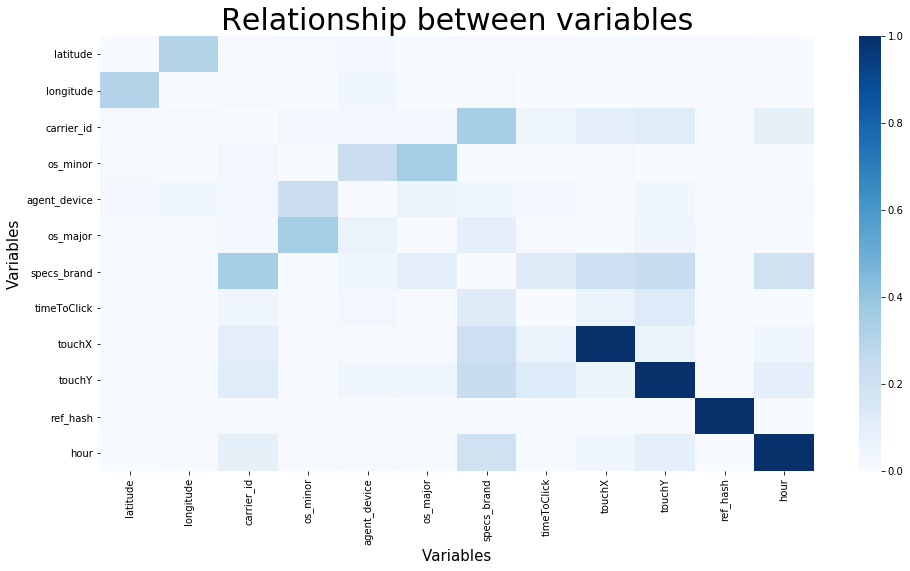

In [7]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = clicks.corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Blues');
ax.axes.set_title("Relationship between variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)

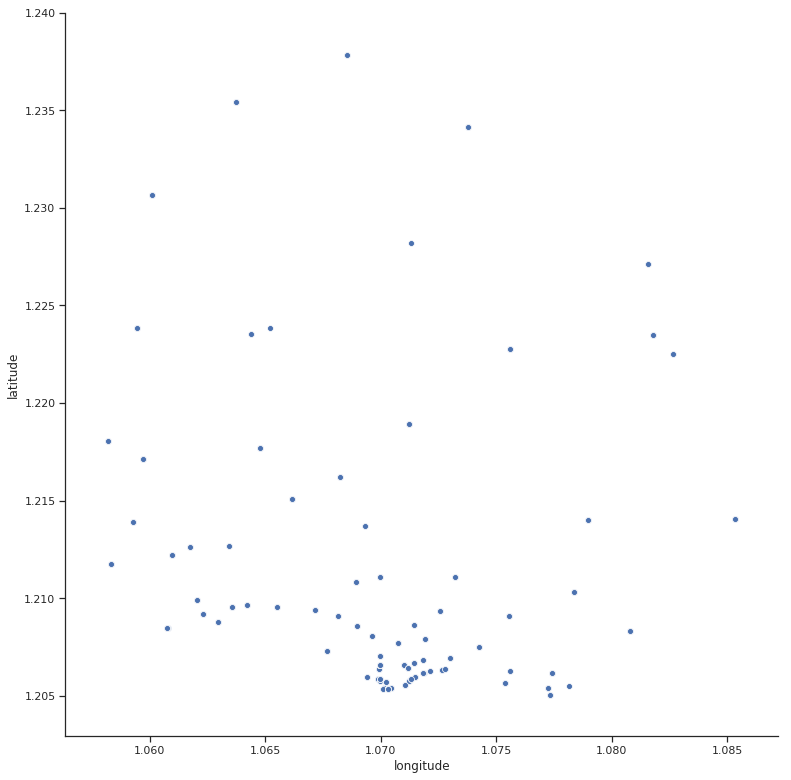

In [8]:
sns.set(style="ticks", color_codes=True)
#sns.pairplot(events, vars = ['event_id', 'ref_type', 'application_id'])
sns.pairplot(clicks, x_vars = ["longitude"], y_vars = ["latitude"], height = 11);

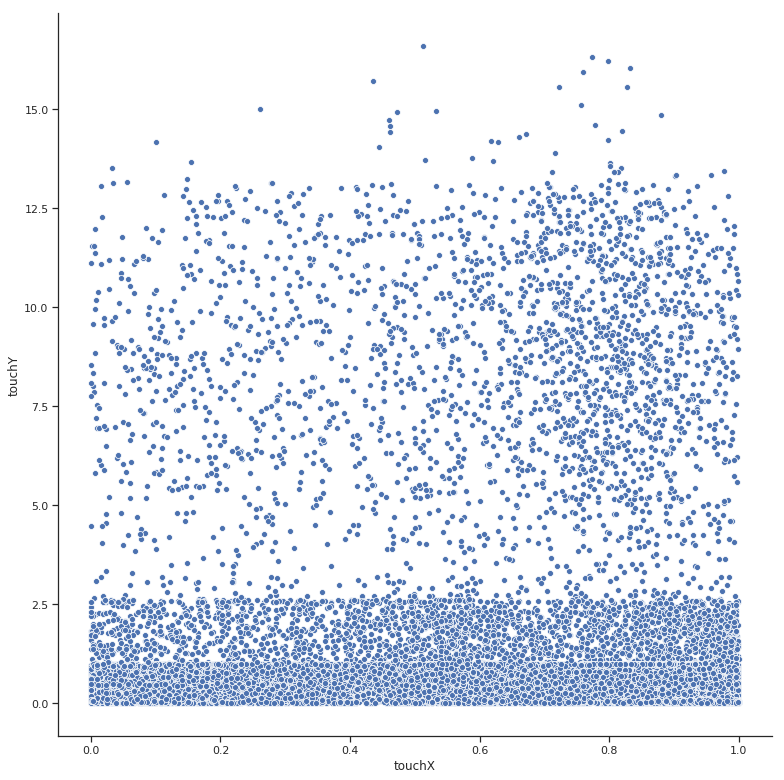

In [9]:
sns.set(style="ticks", color_codes=True)
clicks_acotado= clicks.loc[clicks['timeToClick'] != np.NaN].copy()
#sns.pairplot(events, vars = ['event_id', 'ref_type', 'application_id'])
sns.pairplot(clicks_acotado, x_vars = ["touchX"], y_vars = ["touchY"], height = 11);
#sns.pairplot(clicks, x_vars = ["touchX"], y_vars = ["touchY"], height = 11, hue='timeToClick');

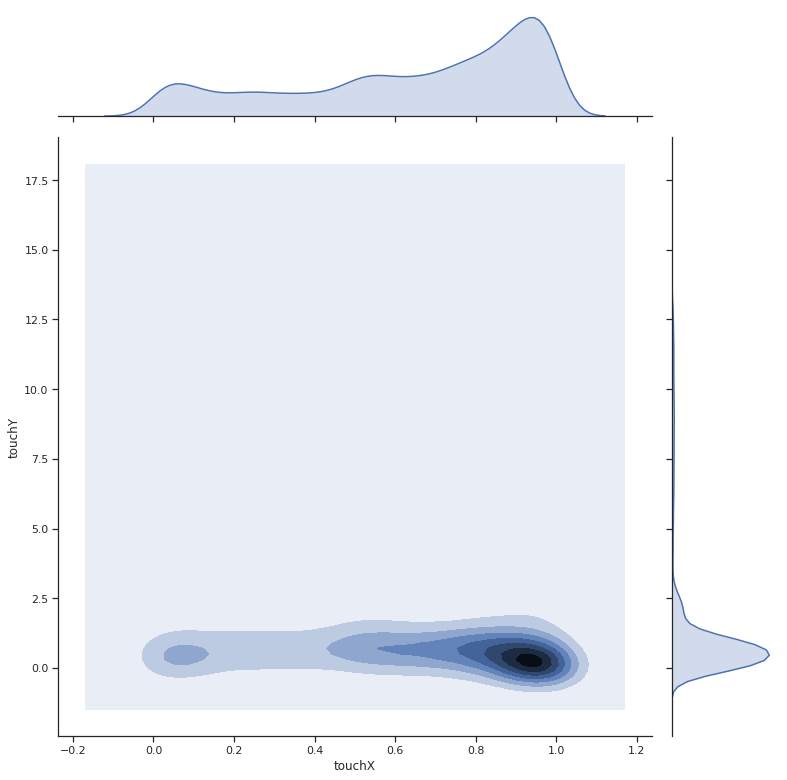

In [10]:
#fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
sns.jointplot(x="touchX", y="touchY", data=clicks_acotado, kind="kde", height = 11);
#ax.axes.set_title("tu vieja",fontsize=30)
#ax.set_xlabel("vieja",fontsize=15)
#ax.set_ylabel("tu",fontsize=15)
#ax.tick_params(labelsize=10)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


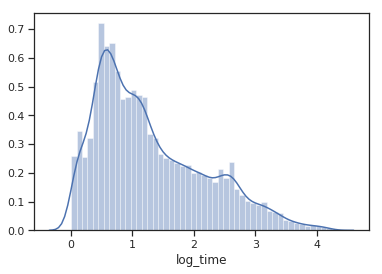

In [11]:
clicks['log_time'] = np.log10(clicks['timeToClick'] +1)
clicks_acotado = clicks.dropna(subset= ['log_time'])
g = sns.distplot(clicks_acotado['log_time'])

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


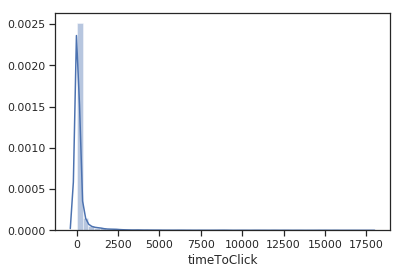

In [12]:
g = sns.distplot(clicks_acotado['timeToClick'])

In [13]:
bins = pd.IntervalIndex.from_tuples([(600, 100000), (180, 600), (60, 180), (15, 60), (3, 15), (0, 3)])
clicks_acotado['time_categ'] = pd.cut(clicks_acotado['timeToClick'],bins)
clicks_acotado['time_categ'].cat.categories = ['muy tardio','tardio','medio','rapido','muy rapido','instantaneo']

clicks['time_categ'] = pd.cut(clicks['timeToClick'],bins)
clicks['time_categ'].cat.categories = ['muy tardio','tardio','medio','rapido','muy rapido','instantaneo']

clicks_acotado['time_categ'].value_counts()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


muy rapido     7151
instantaneo    5880
rapido         3800
medio          2270
tardio         2202
muy tardio     1674
Name: time_categ, dtype: int64

Text(0,0.5,'tu')

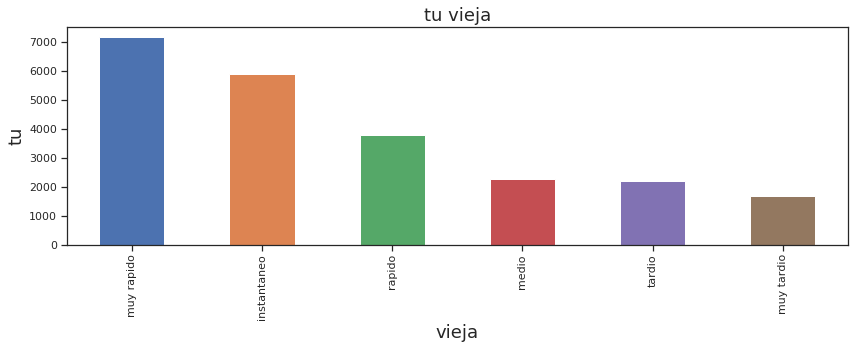

In [14]:
plot = clicks_acotado['time_categ'].value_counts().plot(kind='bar',figsize=(14,4));
plot.set_title("tu vieja", fontsize=18)
plot.set_xlabel("vieja",fontsize=18)
plot.set_ylabel("tu", fontsize=18)

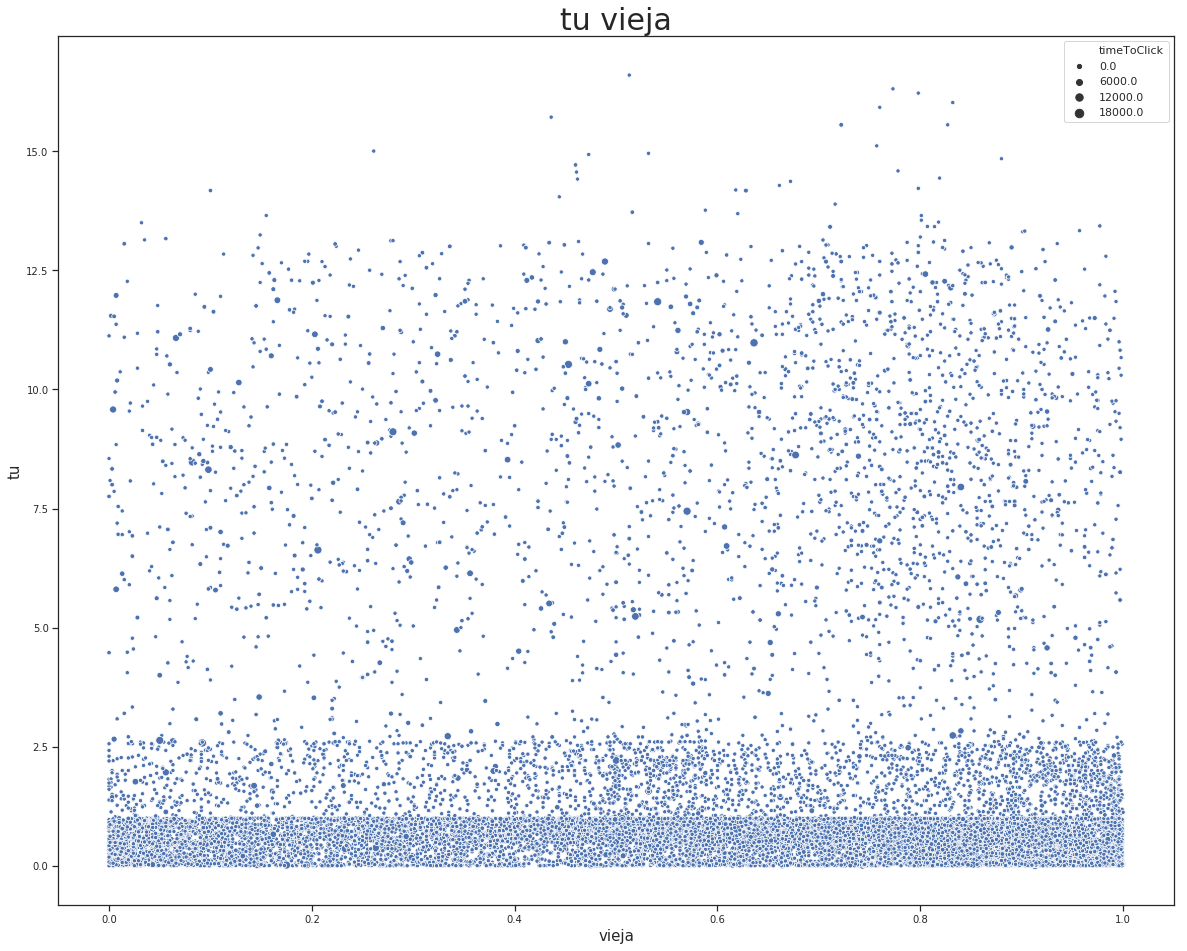

In [15]:
fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
sns.scatterplot(x = clicks_acotado["touchX"], y= clicks_acotado["touchY"], size=clicks_acotado['timeToClick']);
ax.axes.set_title("tu vieja",fontsize=30)
ax.set_xlabel("vieja",fontsize=15)
ax.set_ylabel("tu",fontsize=15)
ax.tick_params(labelsize=10)


In [16]:
len(clicks_acotado['source_id'].cat.categories)

11

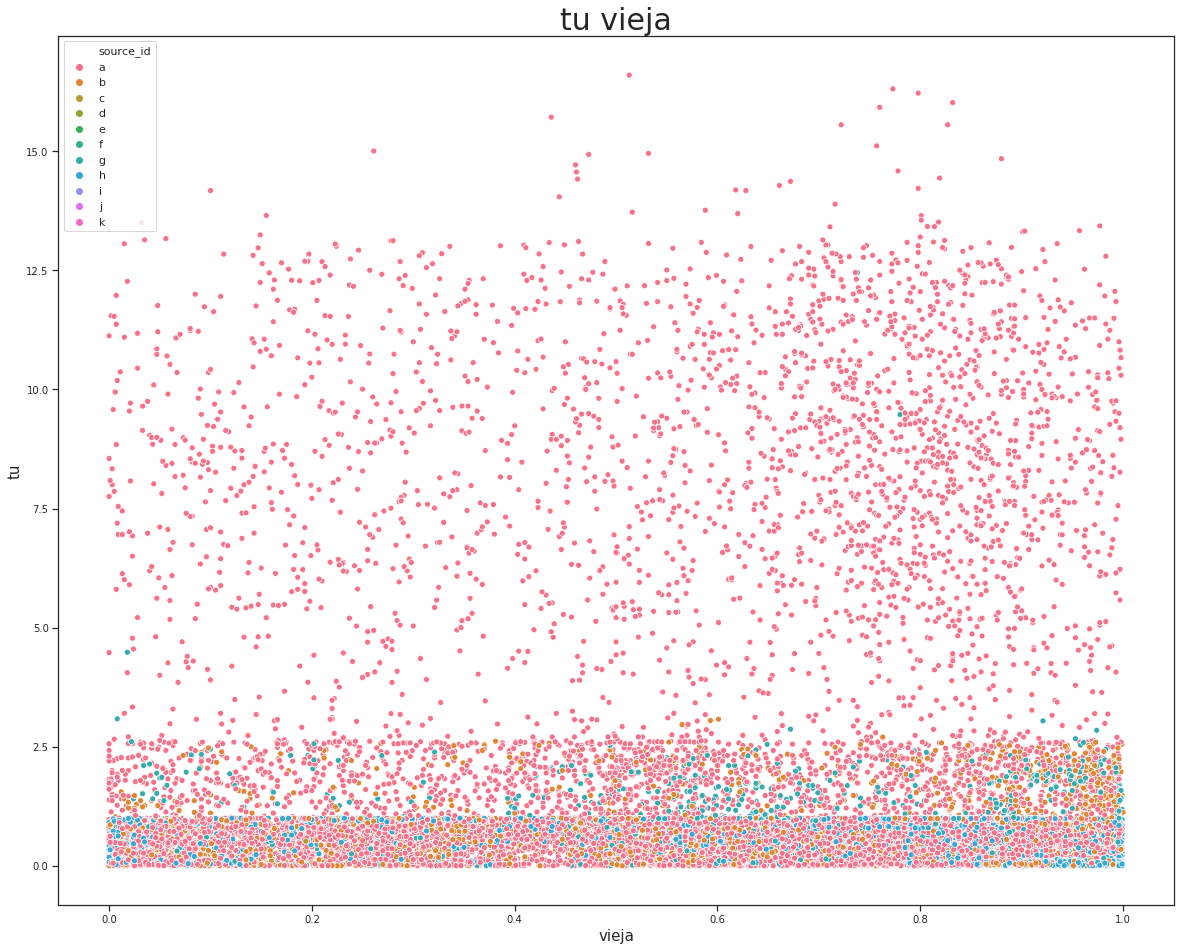

In [17]:
clicks_acotado['source_id'].cat.categories = ['a','b','c','d','e','f','g', 'h', 'i', 'j', 'k']

fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
sns.scatterplot(x = clicks_acotado["touchX"], y= clicks_acotado["touchY"], hue = clicks_acotado['source_id']);
ax.axes.set_title("tu vieja",fontsize=30)
ax.set_xlabel("vieja",fontsize=15)
ax.set_ylabel("tu",fontsize=15)
ax.tick_params(labelsize=10)


In [18]:
'''
                                               'advertiser_id': 'category', 'source_id': 'category',
                                               'created': 'str', 'country_code':'category', 'latitude': 'float64',
                                               'longitude':'float64', 'wifi_connection':'bool' , 'carrier_id':np.float16,
                                               'trans_id':'str', 'os_minor':'float64', 'agent_device':'float64', 'os_major':'float64',
                                               'specs_brand':'int64', 'brand':'category', 'timeToClick':'float64',
                                               'touchX':'float64', 'touchY':'float64', 'ref_type':'category', 'ref_hash':'int64'
'''
clicks_acotado['ref_hash'].value_counts()

4063522808706112974    41
6841615430383729819    32
1244272413279716745    26
1486699123421703687    21
5087801386146573665    20
5410279713092214908    16
5141358577301248038    16
6720955205547143860    14
8292793494956750501    14
1800317677967270083    14
9122294037688413433    14
1331942267794810997    14
925803901826809324     13
4087245142961821607    13
8649985029035959510    13
519658456951133298     13
2878289124029282270    13
1211156366060784398    13
1387843078329628240    12
871778630200697460     12
2108916708309430205    12
7539041810210425316    12
2161849021063988604    12
1022865914163198106    12
6972928558719957056    12
3272242210010018861    12
9013086364156440526    12
1840632706493884506    12
5137915707382060256    12
7298861376107043945    11
                       ..
6573047323411025370     1
9028394446374452106     1
2893868540560269043     1
691960130017793790      1
7266163469867082428     1
1974091223384432364     1
2837615843911831592     1
619973560363

AttributeError: 'Series' object has no attribute 'value_count'

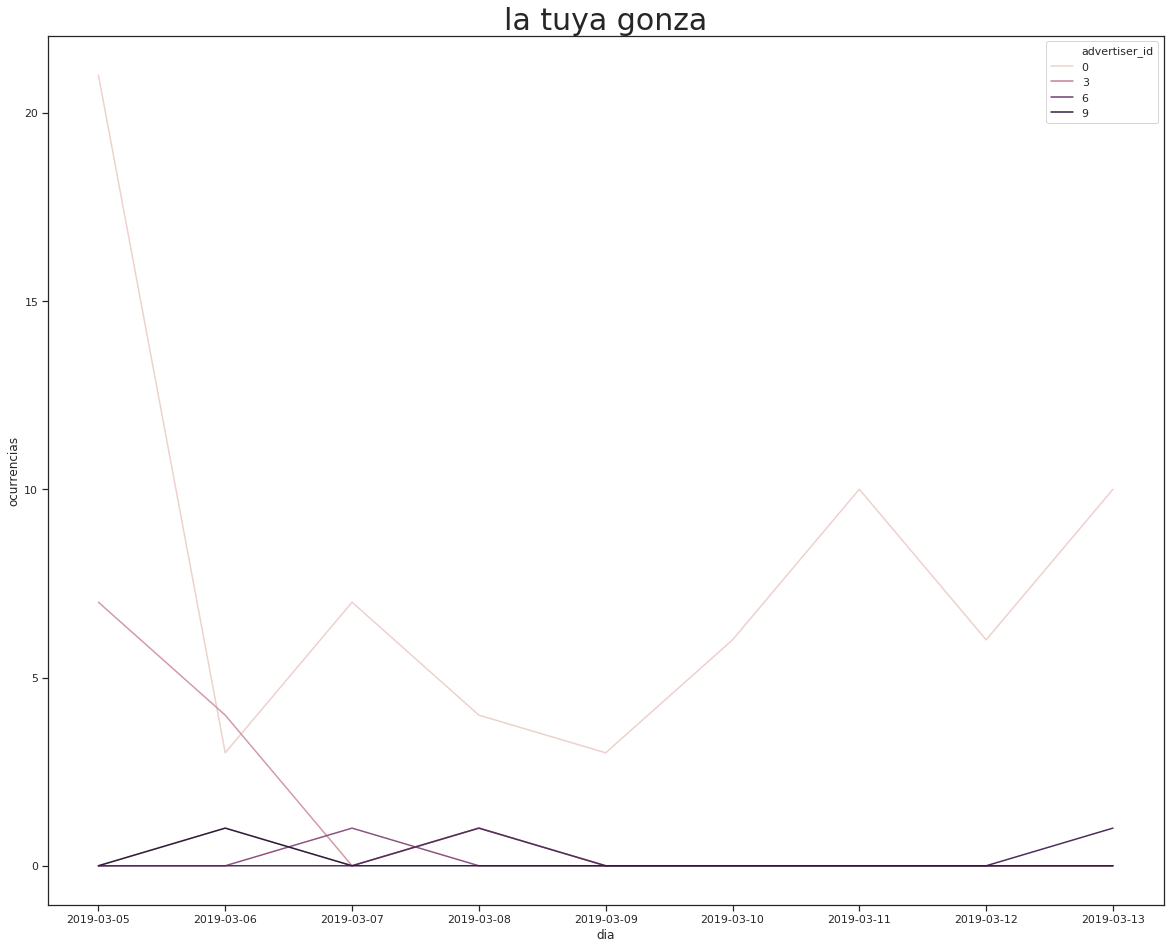

In [19]:
clicks['dia']=clicks['created'].dt.date
clicks['ocurrencias']=1
fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
ax.axes.set_title("la tuya gonza",fontsize=30)
tabla=clicks[['dia','ocurrencias','advertiser_id']].groupby(['dia','advertiser_id']).count()
tabla = tabla.reset_index()
tabla['ocurrencias']=tabla['ocurrencias'].fillna(0)

#tabla['dia'] =tabla['dia']
tabla["advertiser_id"] = pd.to_numeric(tabla["advertiser_id"])
sns.lineplot(x="dia",y="ocurrencias", data= tabla.loc[tabla.advertiser_id !=3] ,ax=ax, hue="advertiser_id",markers=True)
pd.to_numeric(tabla.advertiser_id)
tabla['advertiser_id'].value_count()


In [20]:
grupos = ['advertiser_id', 'carrier_id', 'os_minor', 'agent_device', 'os_major', 'specs_brand', 'ref_type', 'hour', 'day', 'time_categ']
top5 = {}
for i in grupos:
    top5[i]= clicks[i].value_counts().head(5).index.tolist()
top5

{'advertiser_id': ['3', '0', '2', '7', '1'],
 'agent_device': [3.516811792181616e+18,
  1.7545278564638182e+18,
  6.88241452041436e+18,
  7.787530752469096e+18,
  4.2817293286141727e+18],
 'carrier_id': [4.0, 6.0, 1.0, 13.0, 3.0],
 'day': [datetime.date(2019, 3, 12),
  datetime.date(2019, 3, 11),
  datetime.date(2019, 3, 10),
  datetime.date(2019, 3, 13),
  datetime.date(2019, 3, 9)],
 'hour': [1, 23, 2, 11, 22],
 'os_major': [3.072849339937028e+18,
  4.5664539119756943e+18,
  1.77408510258909e+18,
  7.452405704979208e+18,
  5.745805136738488e+18],
 'os_minor': [3.3786399484966047e+18,
  6.768137412412545e+18,
  5.97565607170903e+18,
  3.5115378169499003e+18,
  6.391567095202501e+18],
 'ref_type': ['1891515180541284343',
  '1494519392962156891',
  '5016171802147987303',
  '6323871695571587575'],
 'specs_brand': [392184377613098015,
  2733035977666442898,
  8930605132947907029,
  3855167788531275156,
  5675295985273558497],
 'time_categ': ['muy rapido', 'instantaneo', 'rapido', 'medio',

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


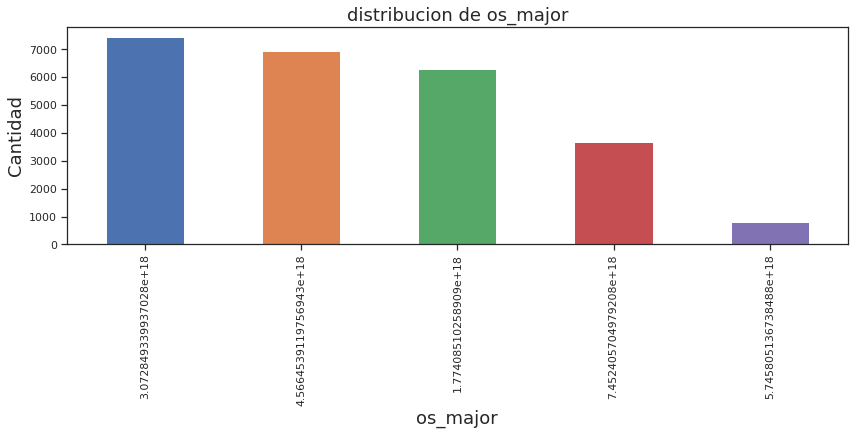

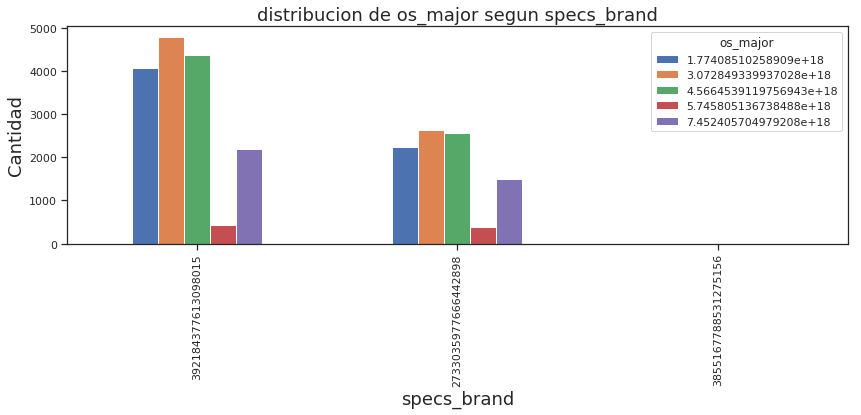

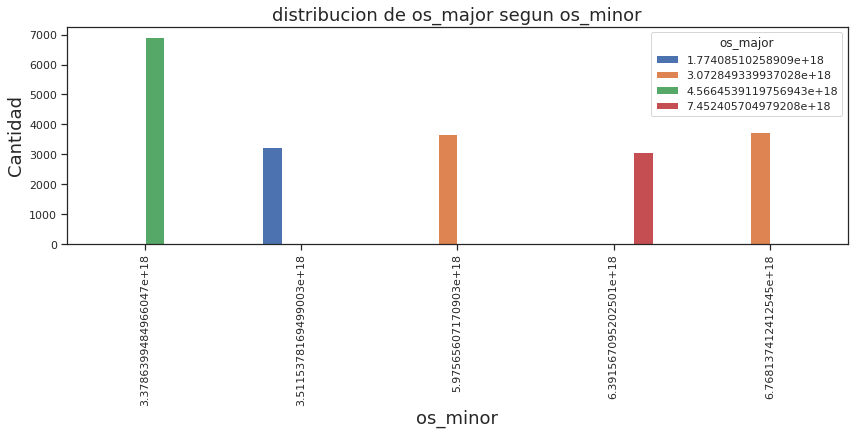

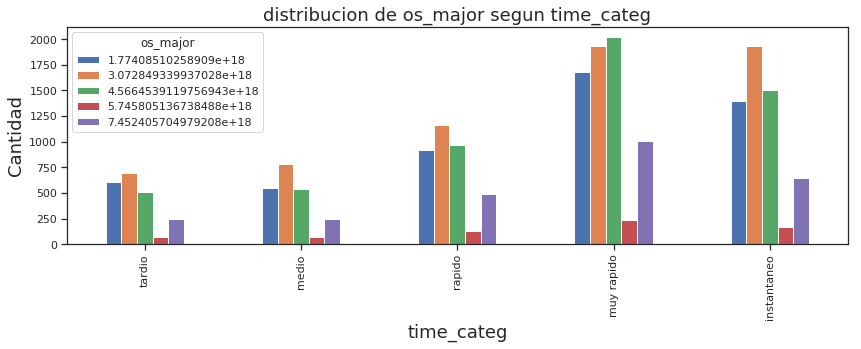

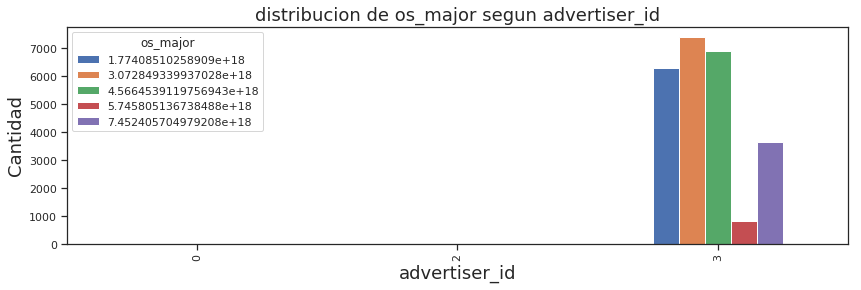

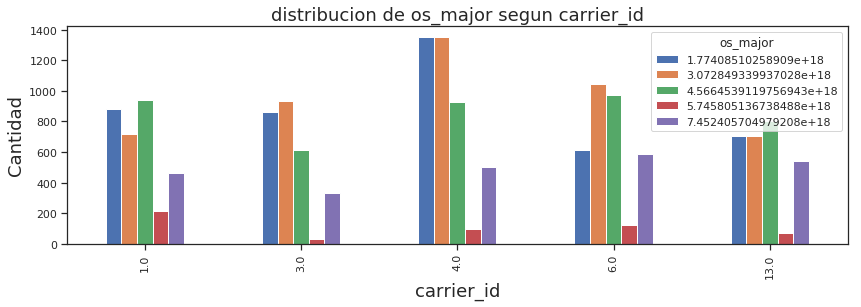

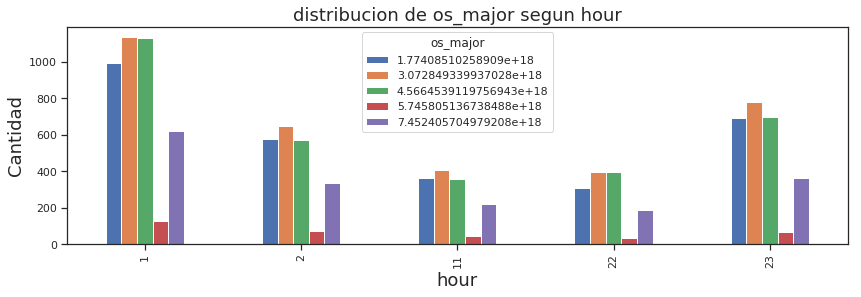

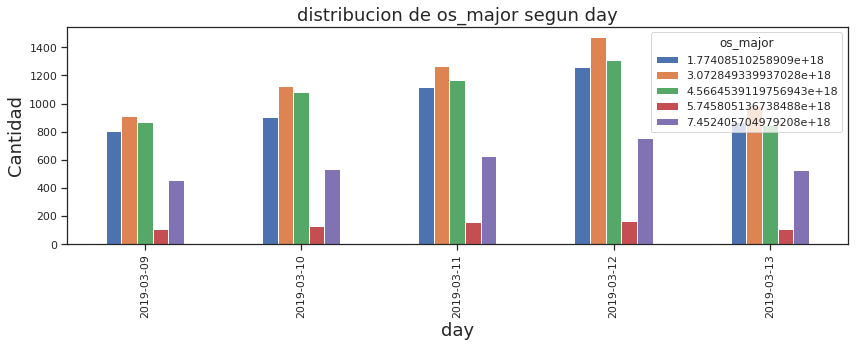

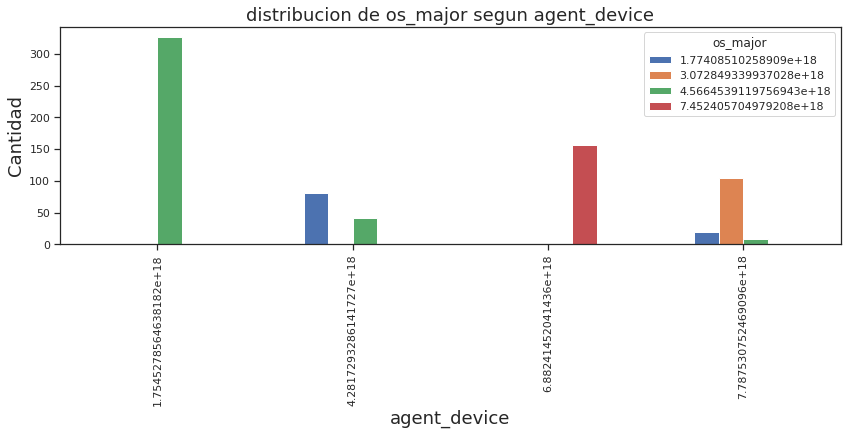

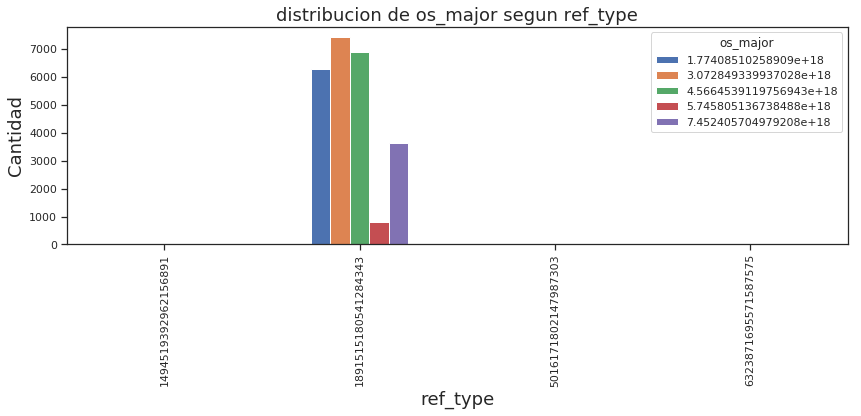

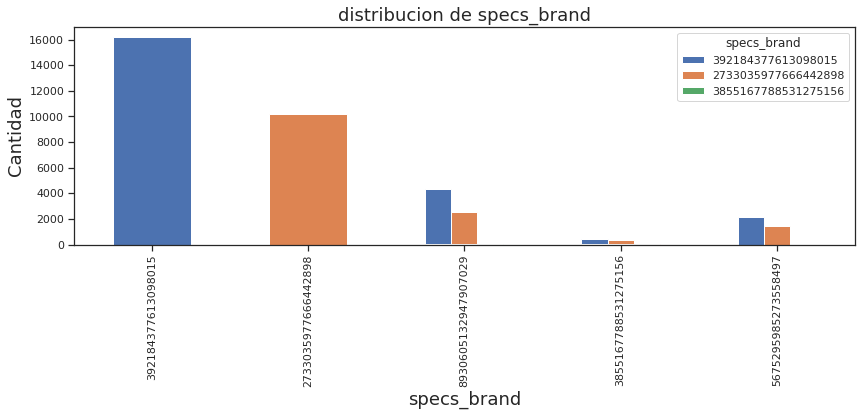

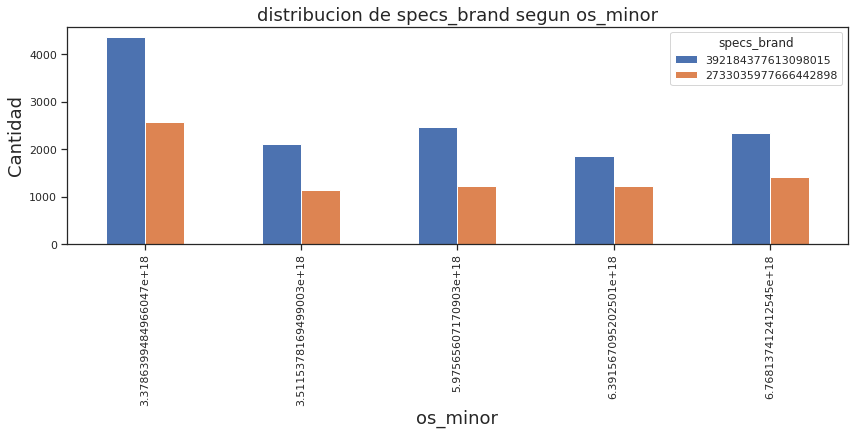

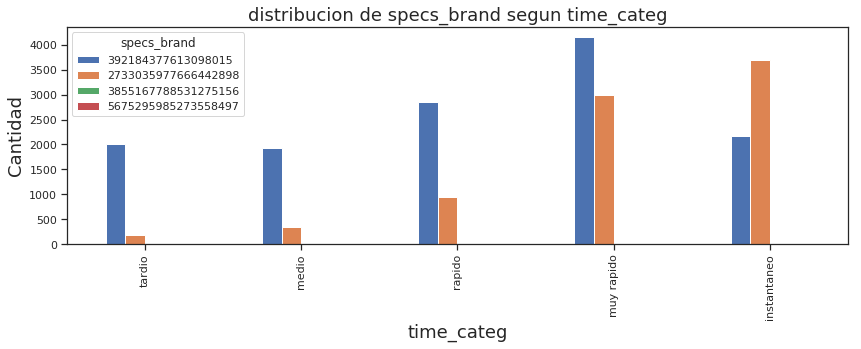

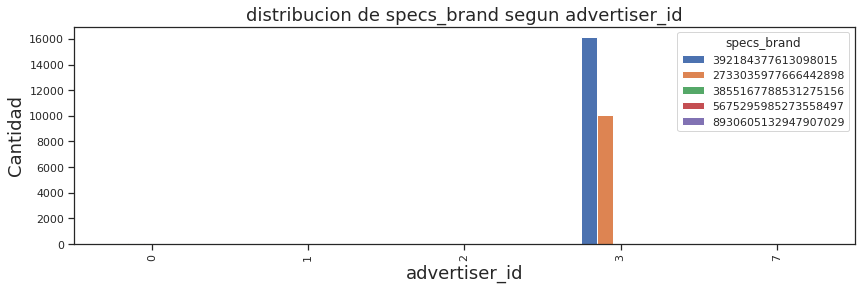

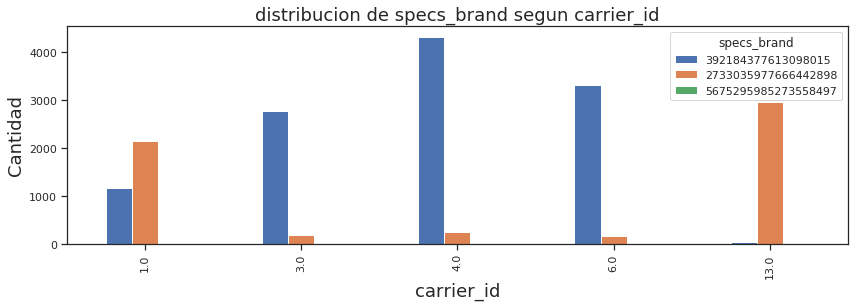

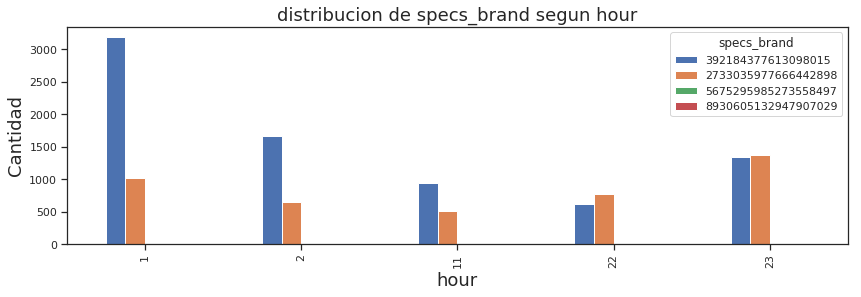

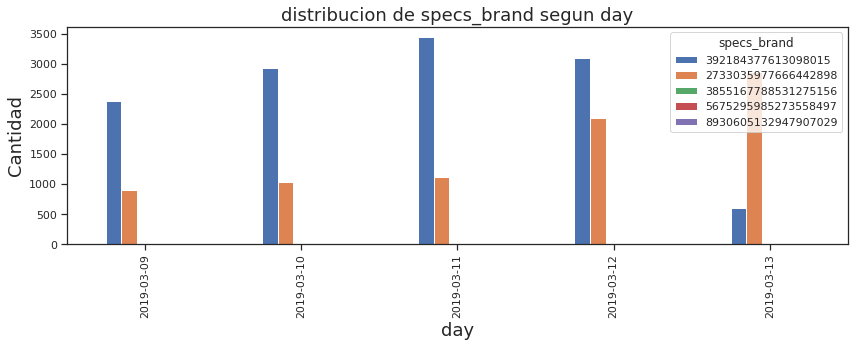

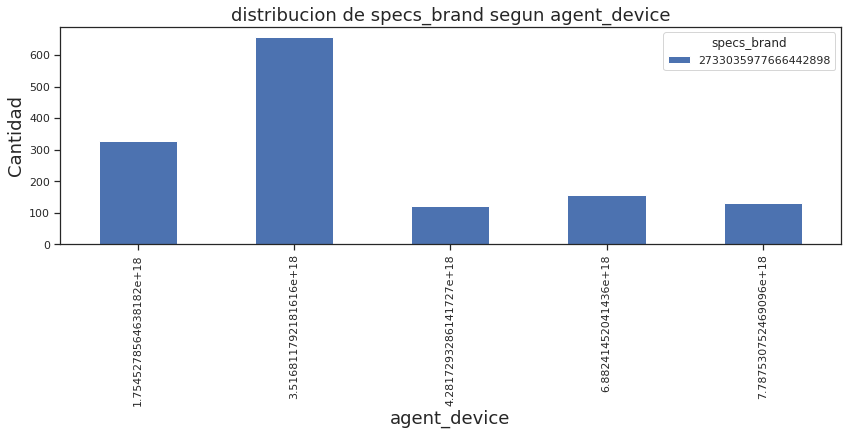

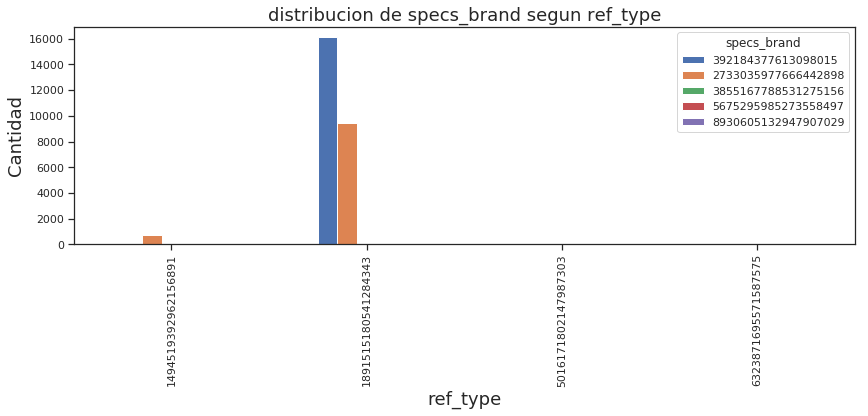

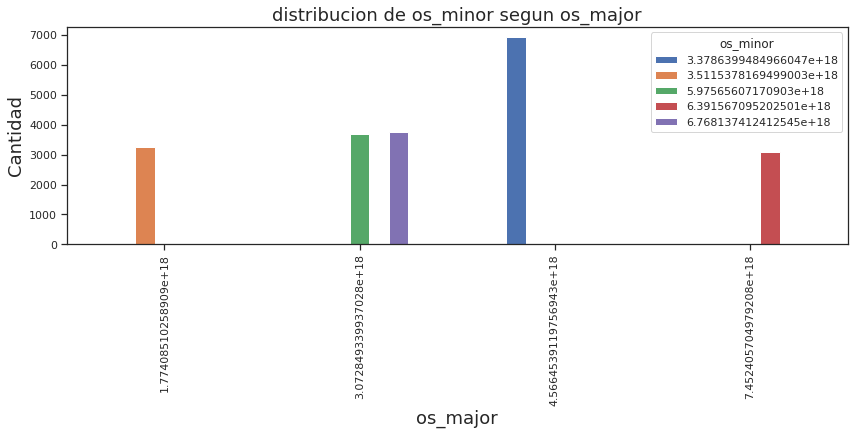

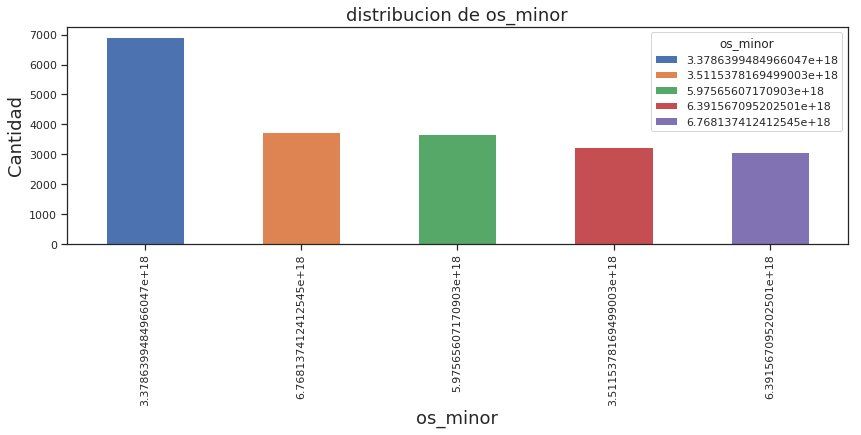

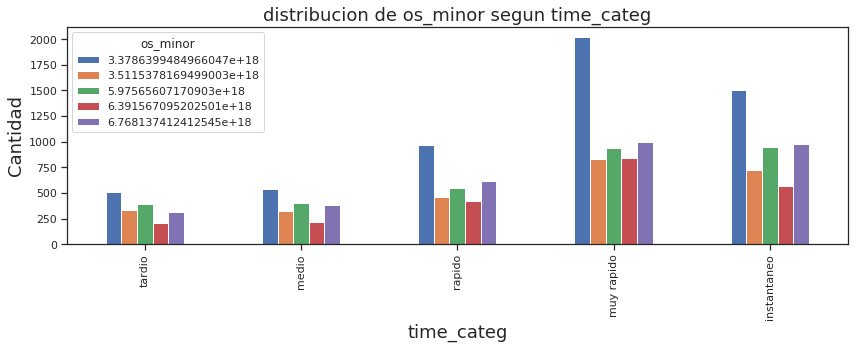

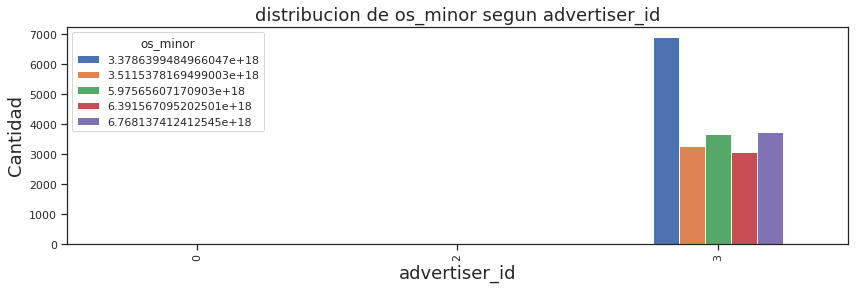

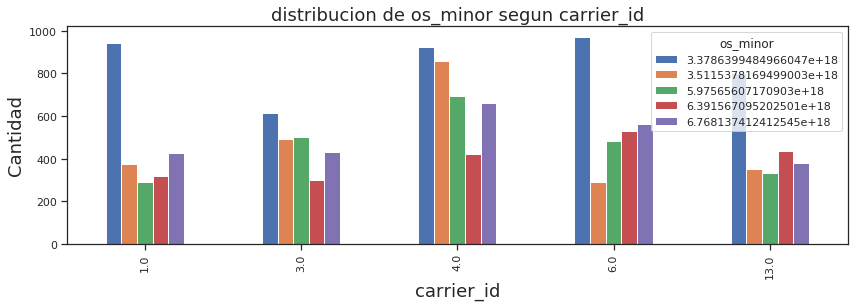

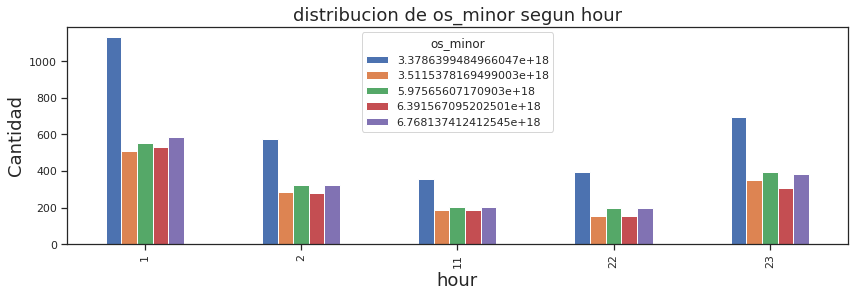

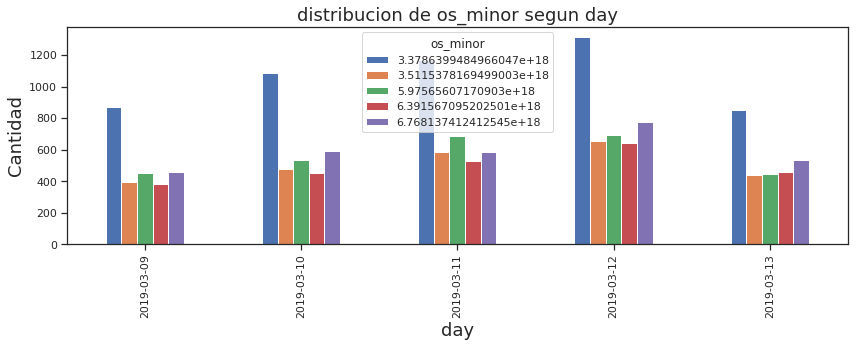

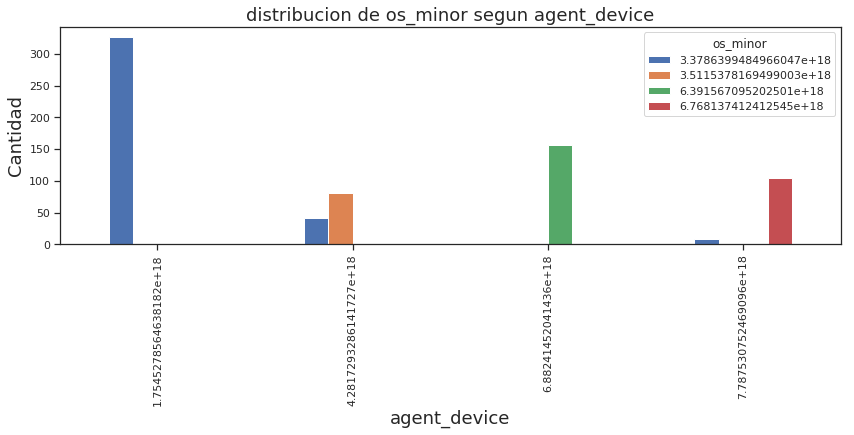

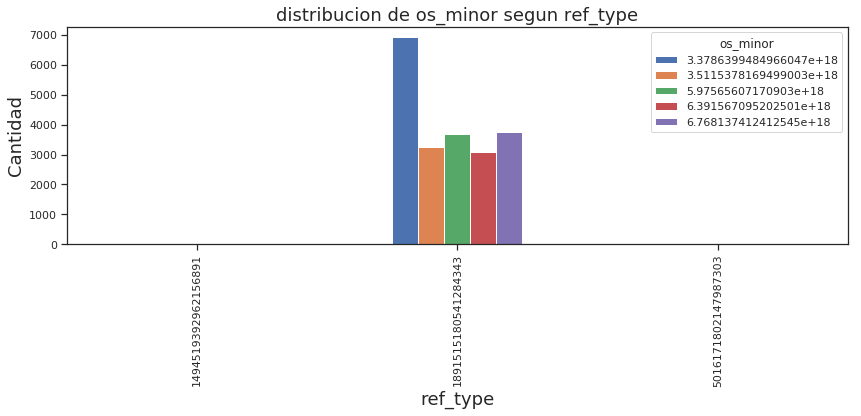

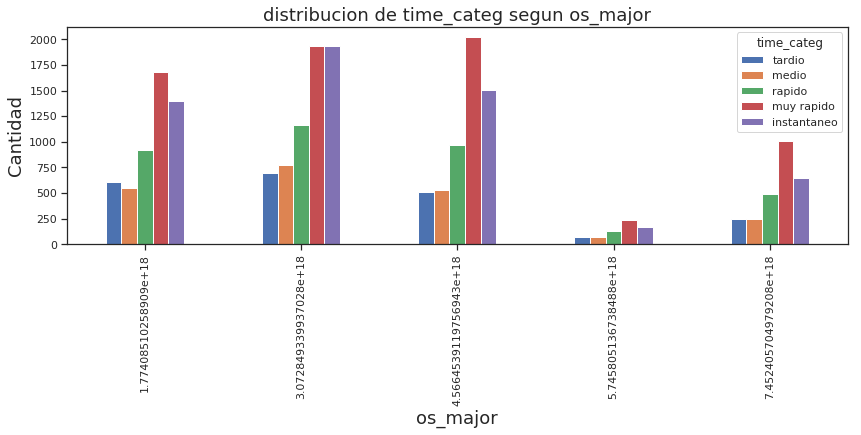

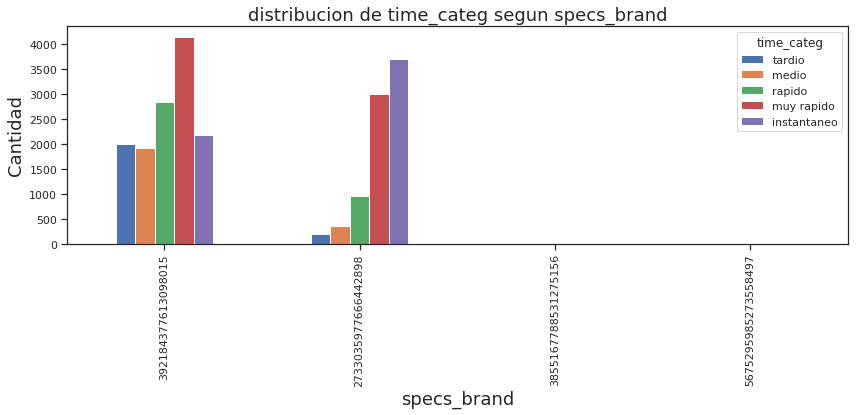

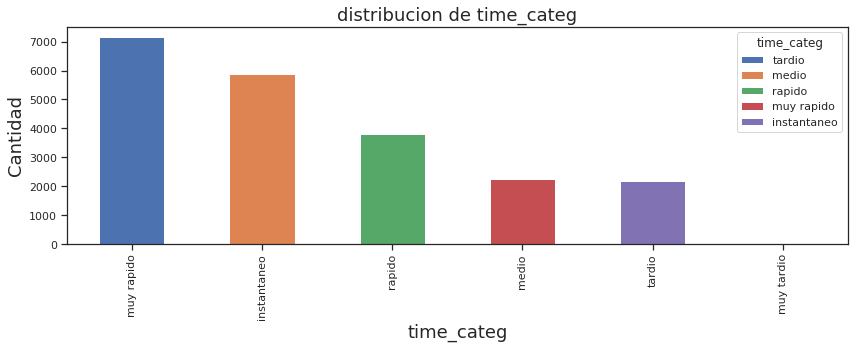

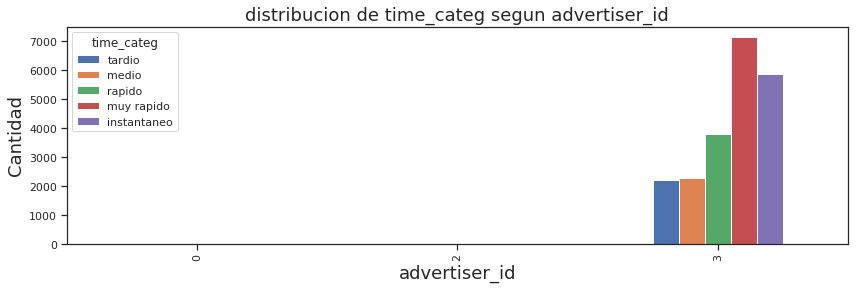

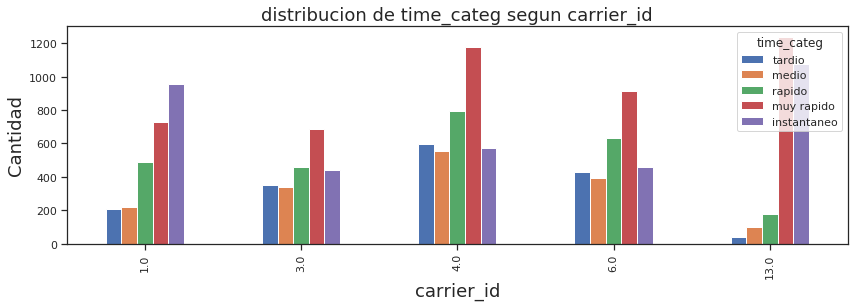

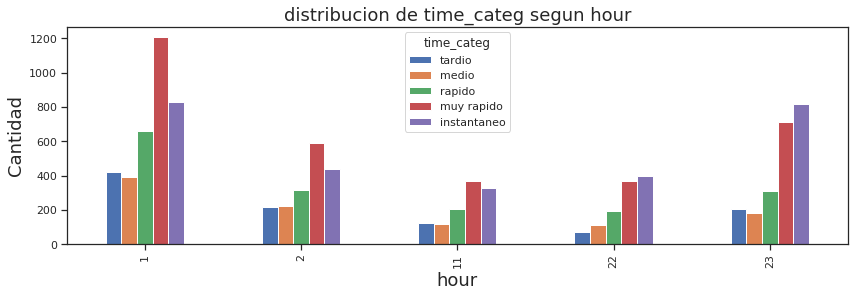

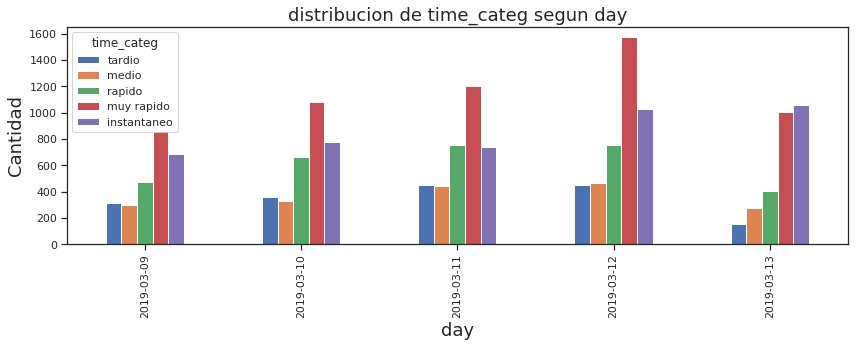

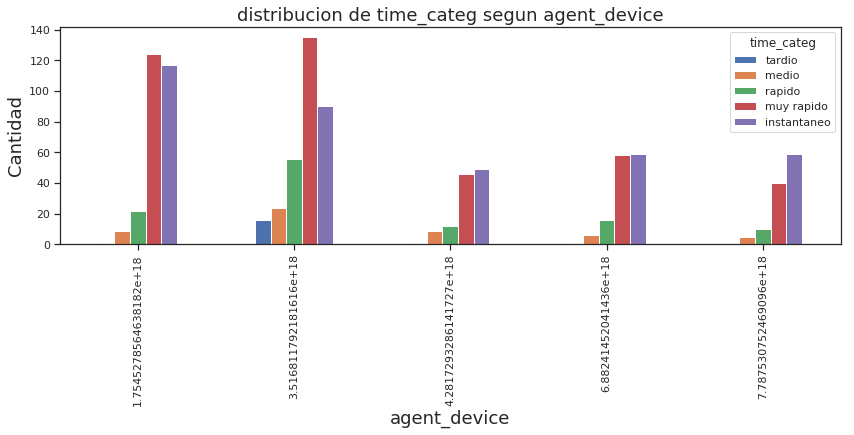

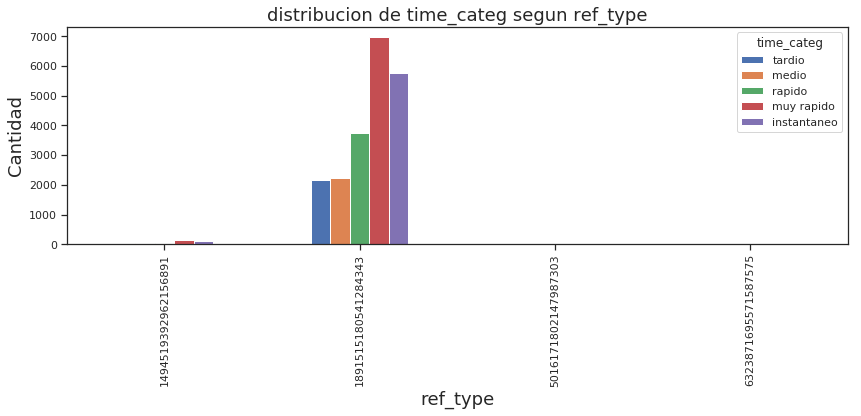

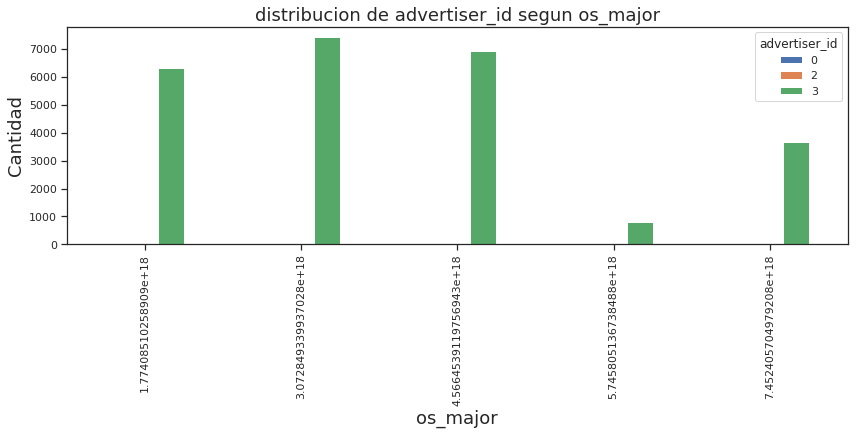

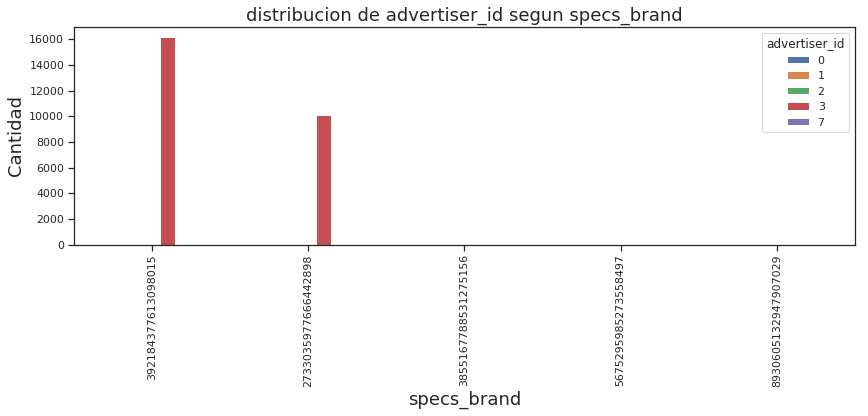

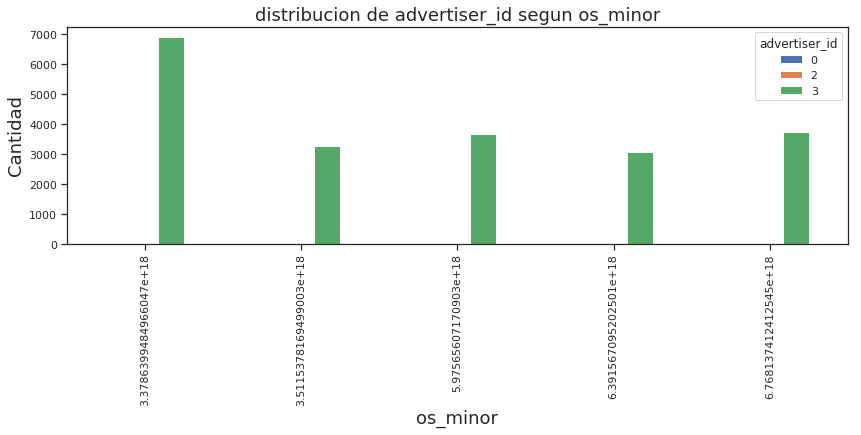

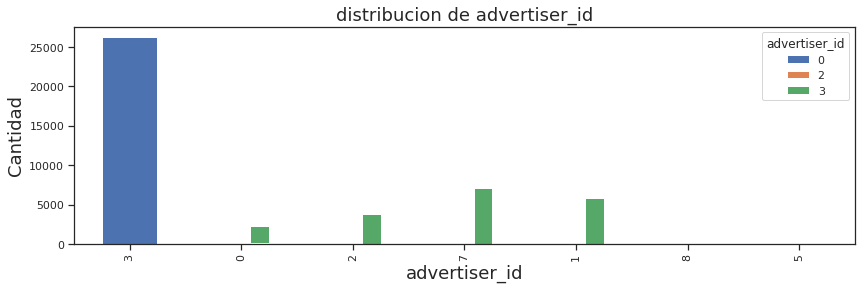

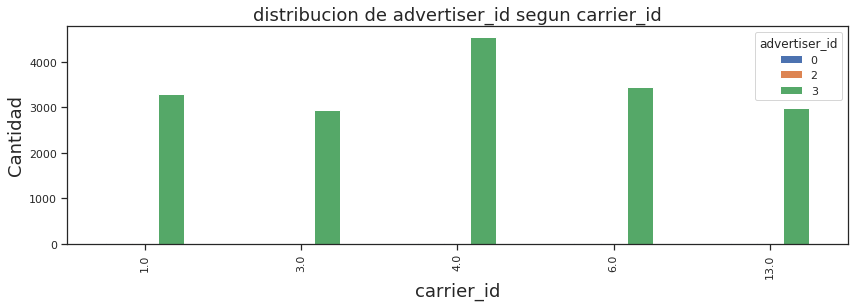

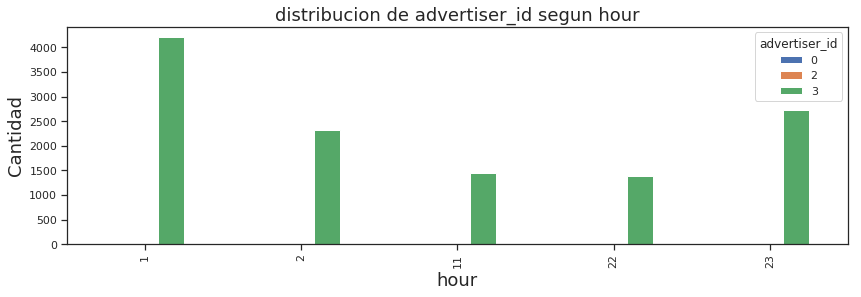

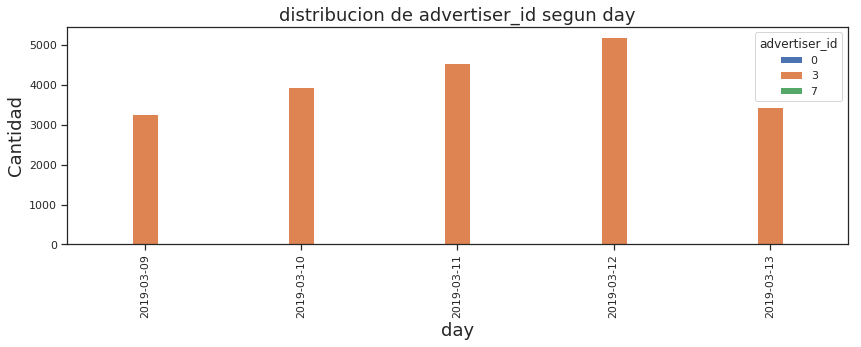

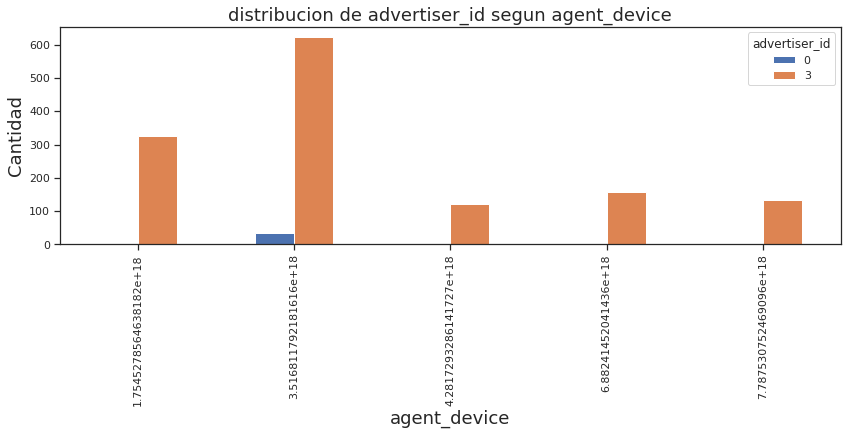

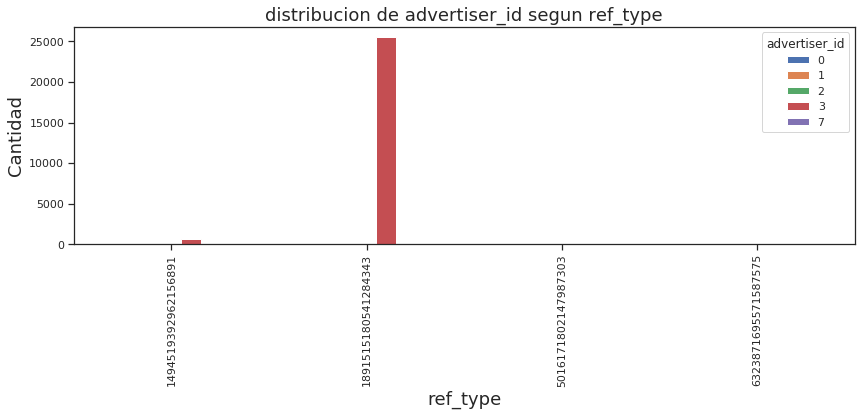

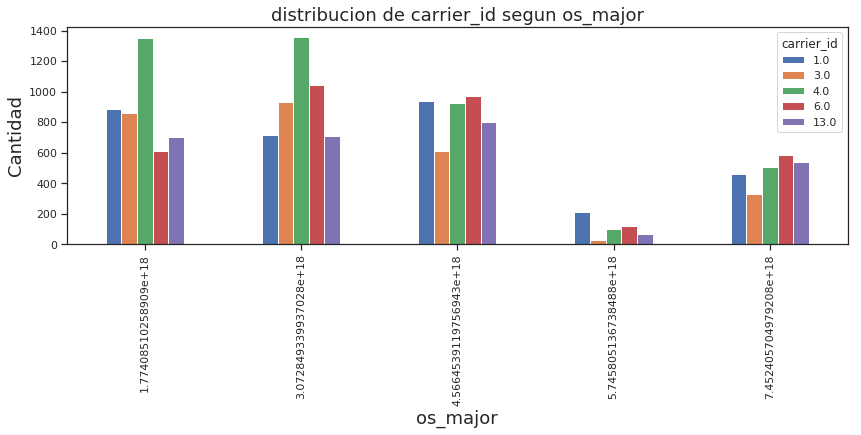

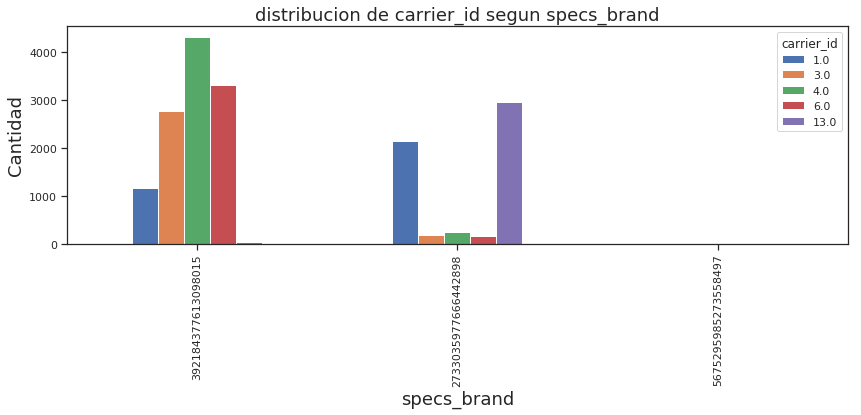

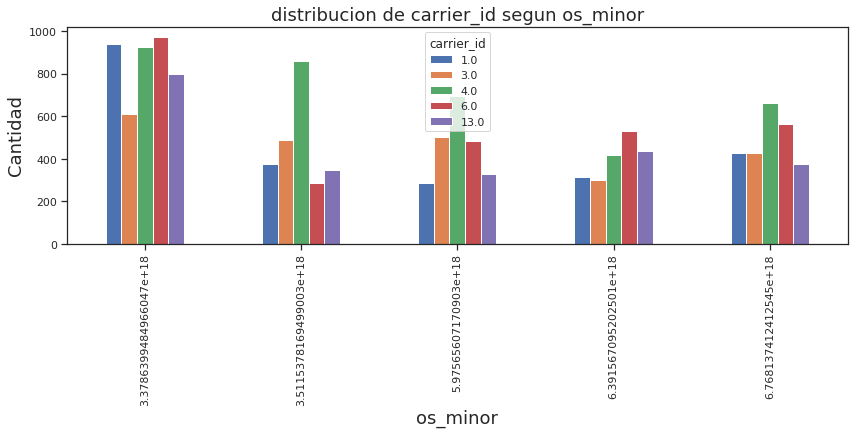

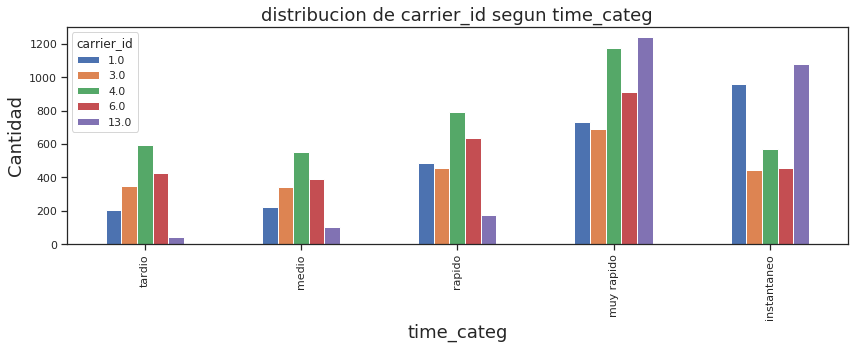

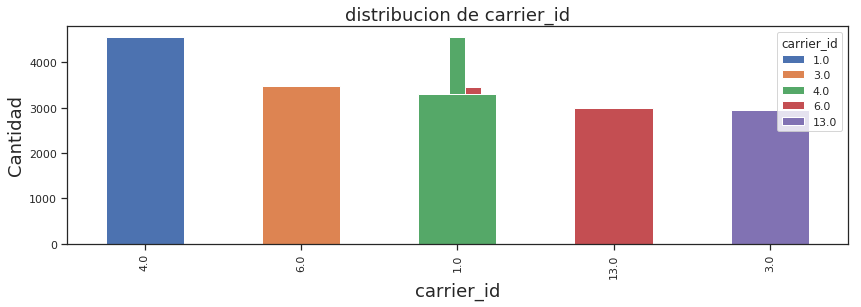

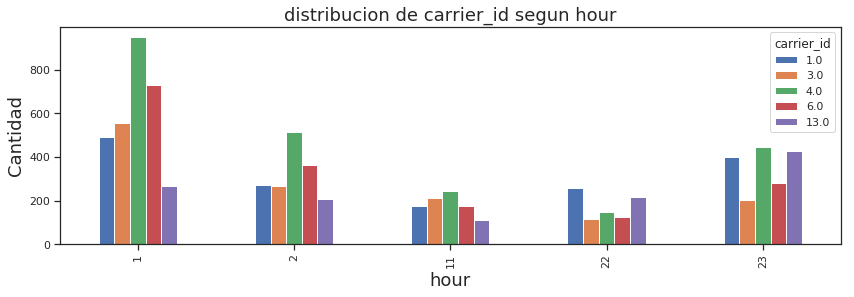

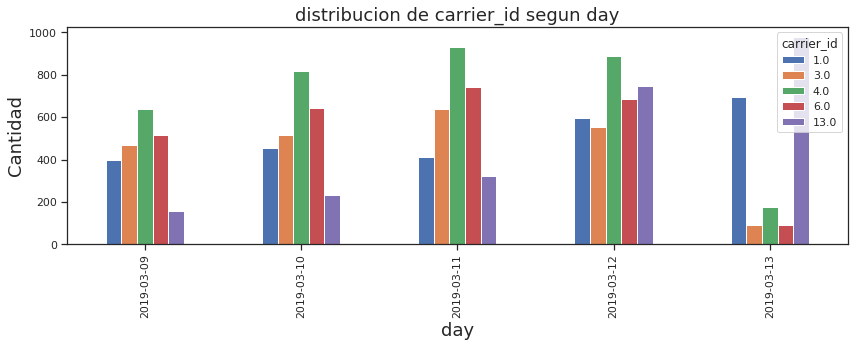

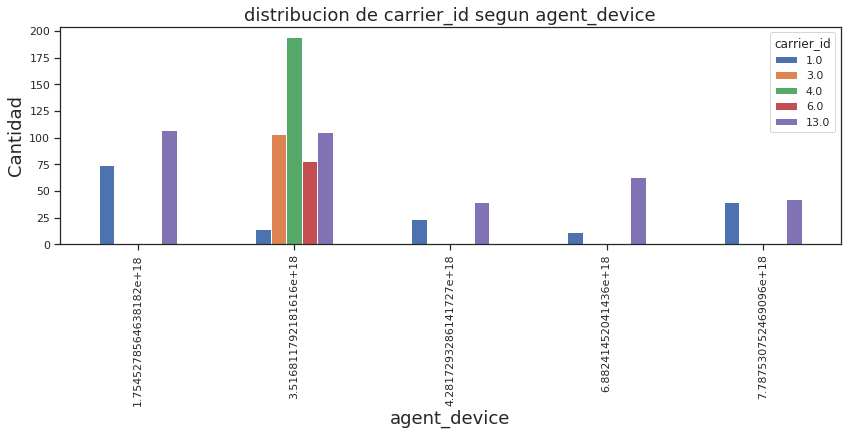

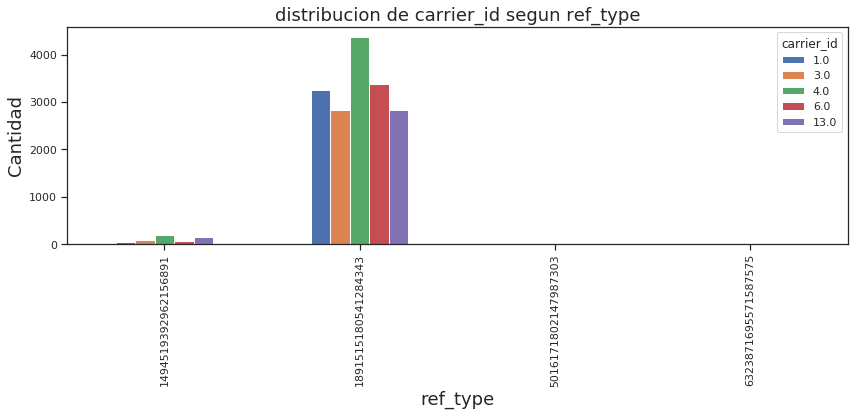

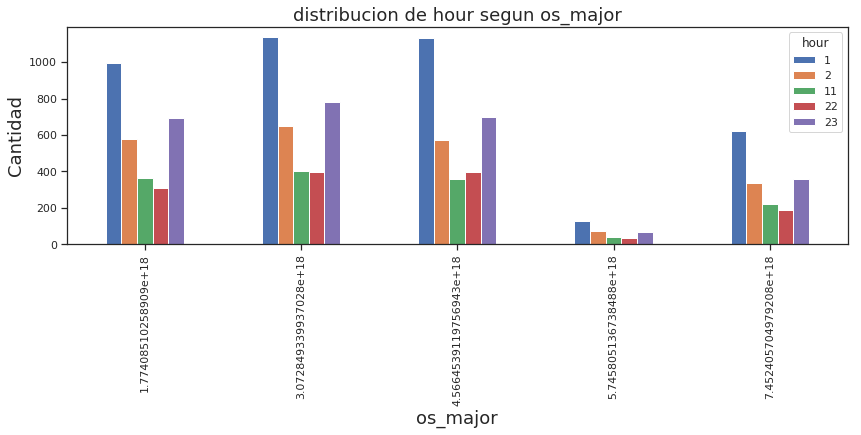

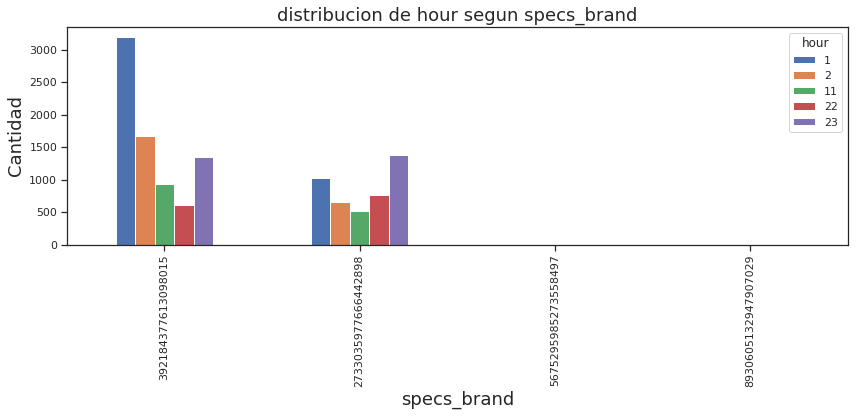

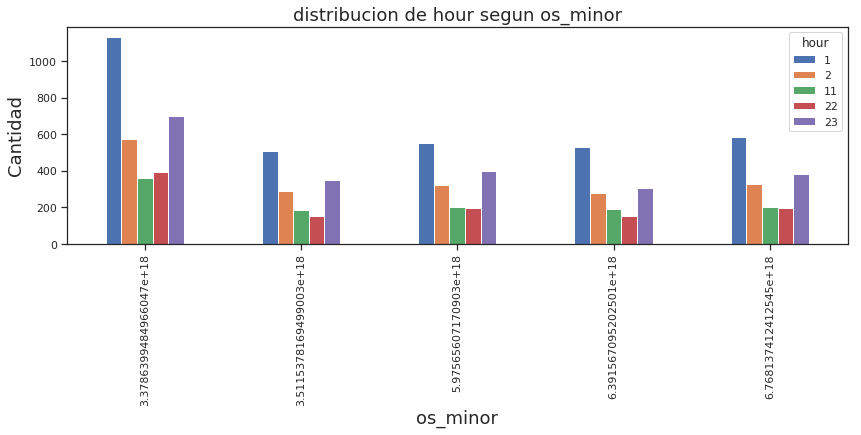

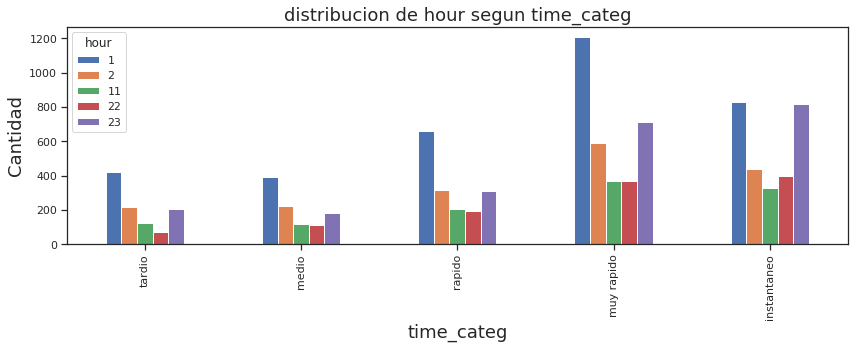

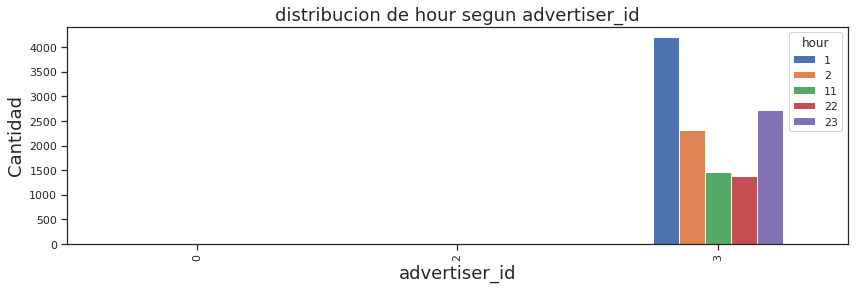

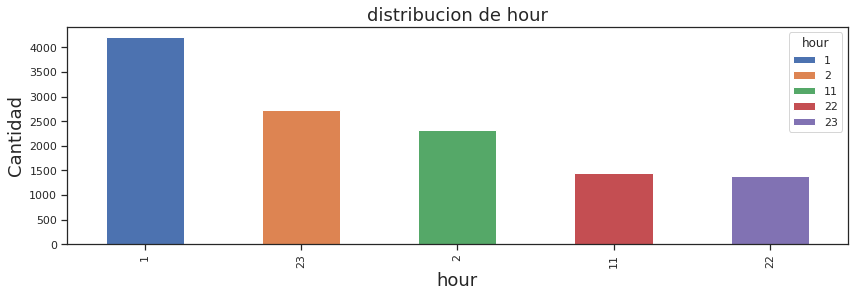

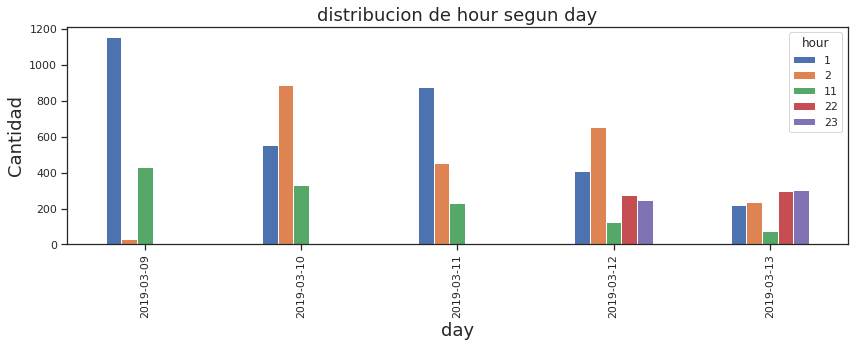

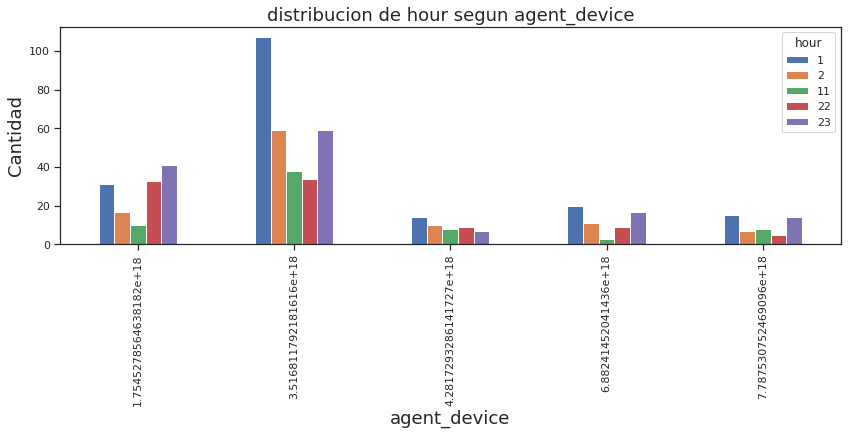

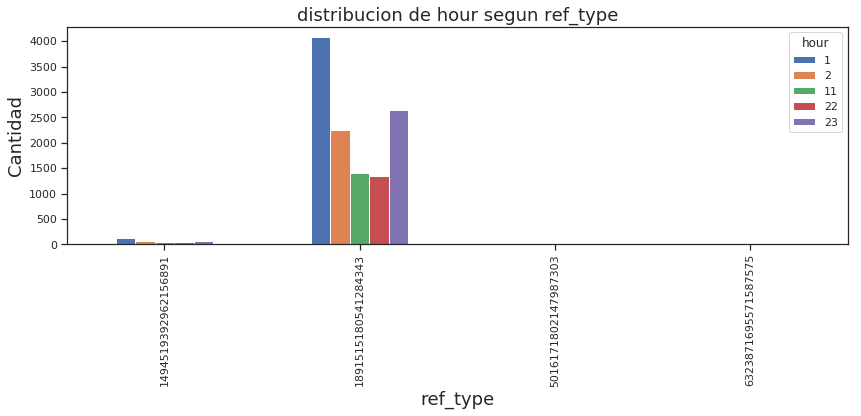

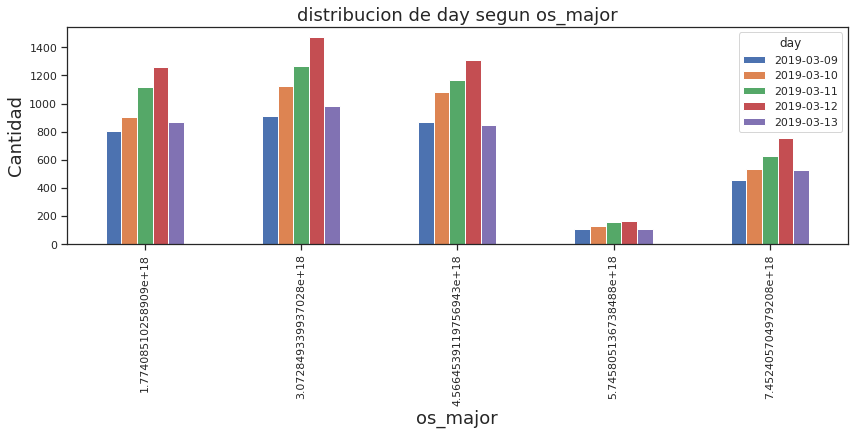

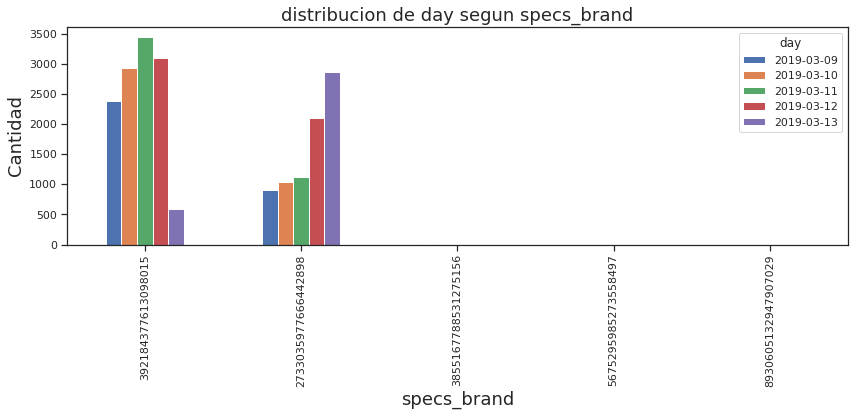

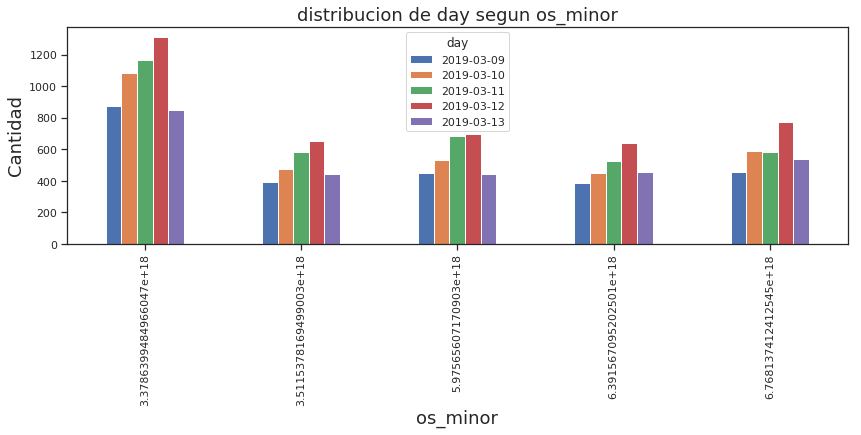

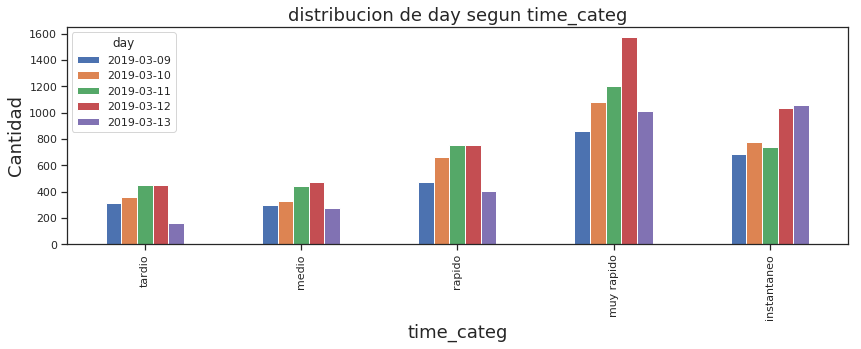

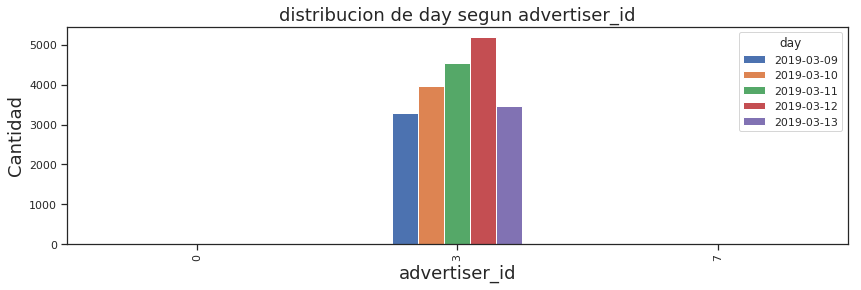

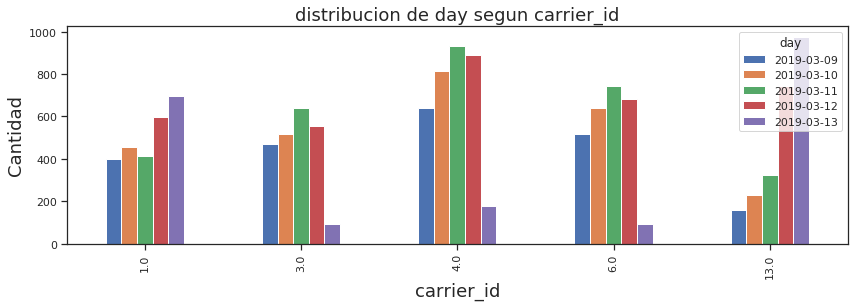

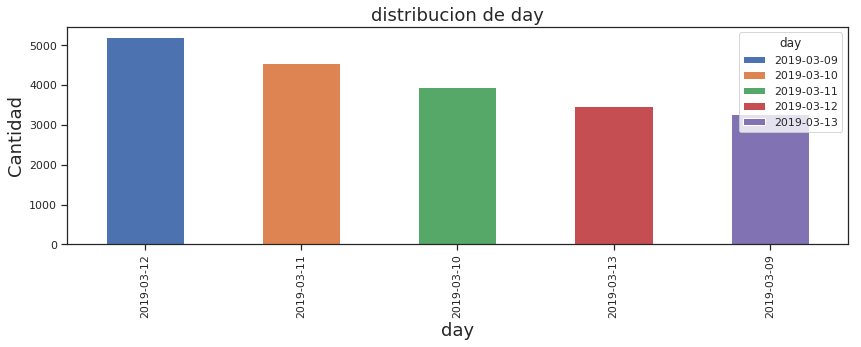

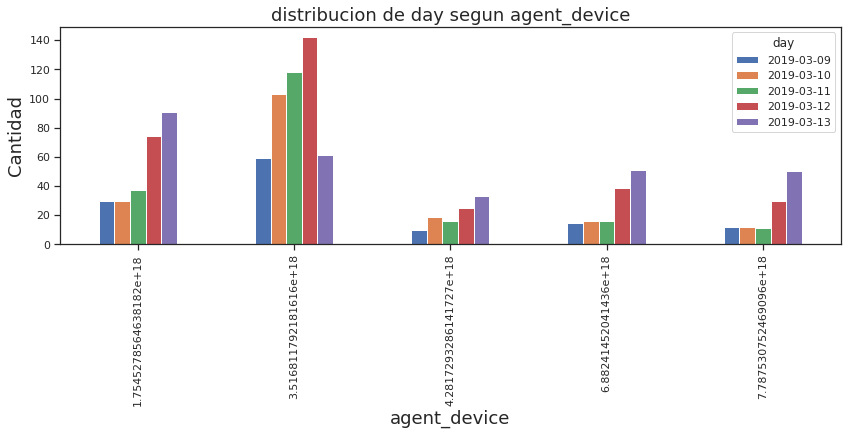

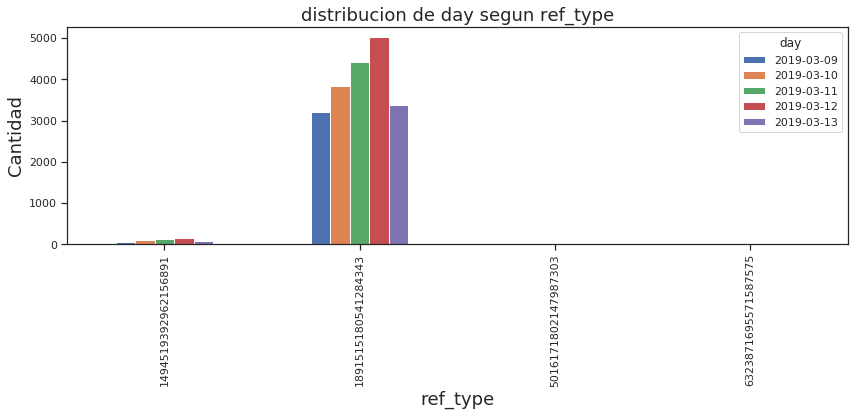

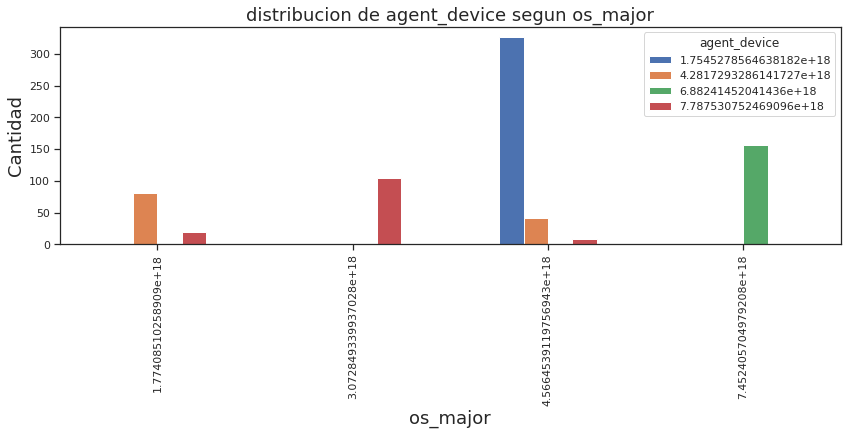

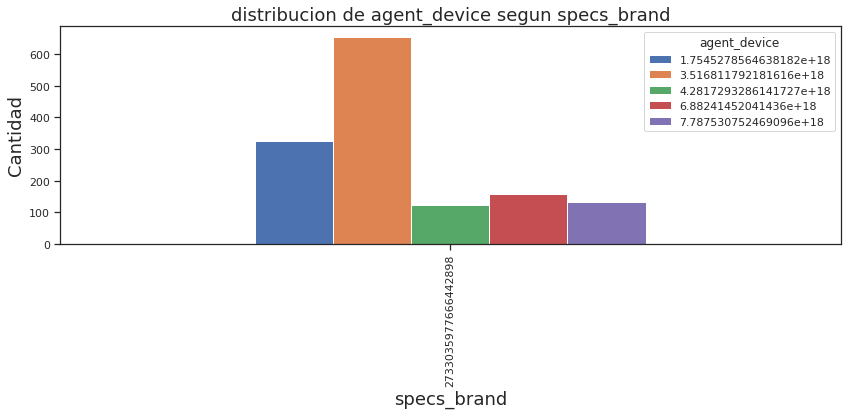

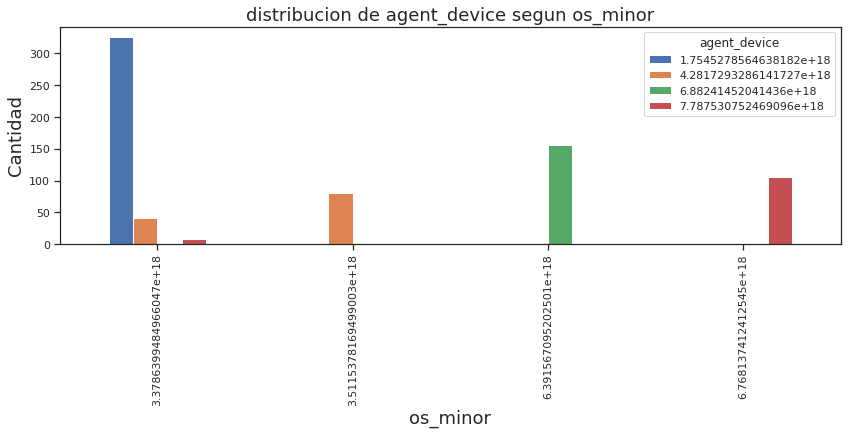

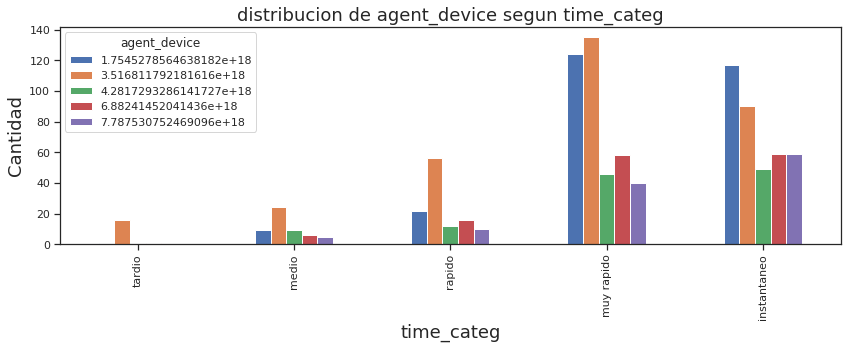

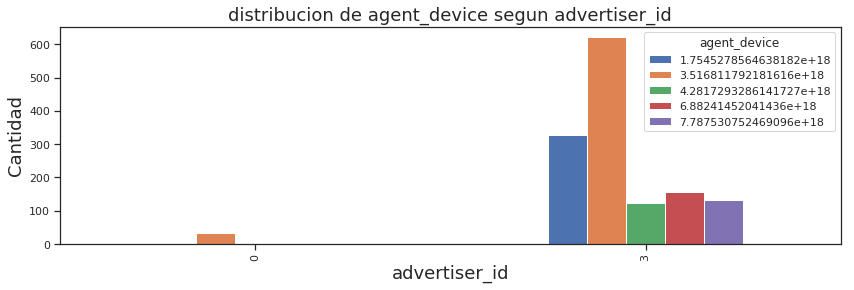

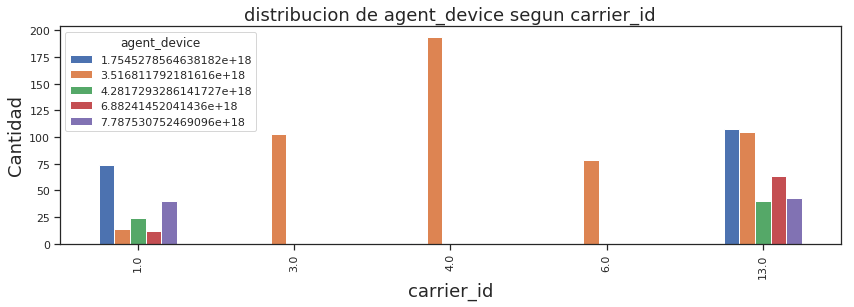

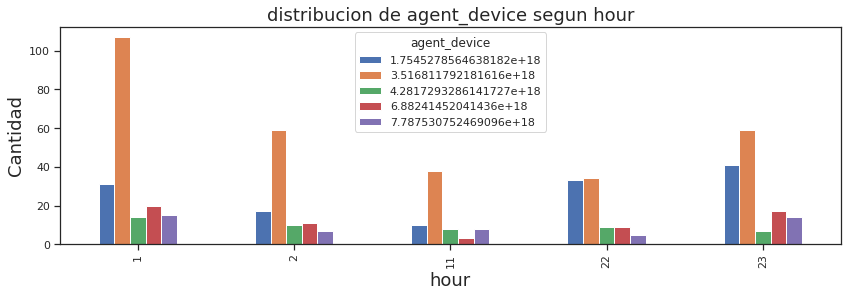

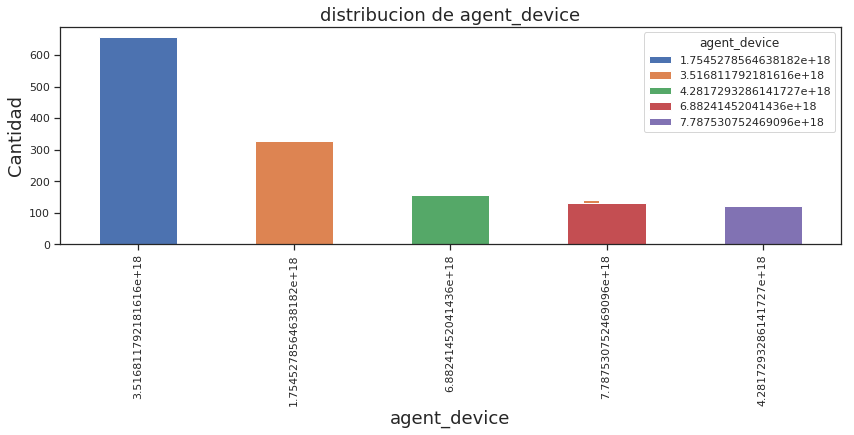

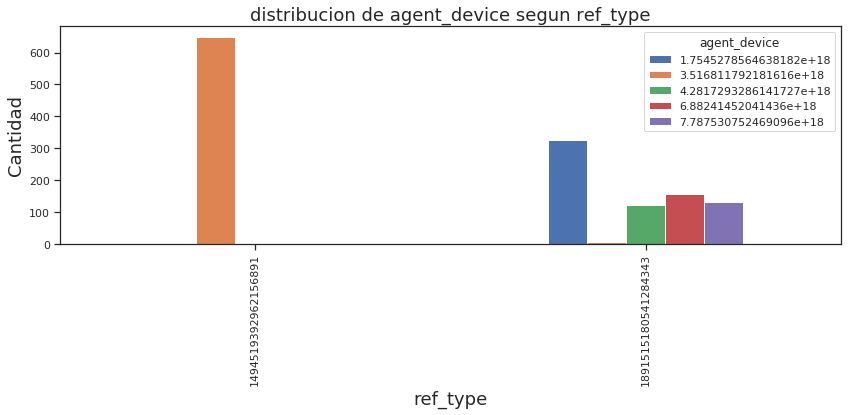

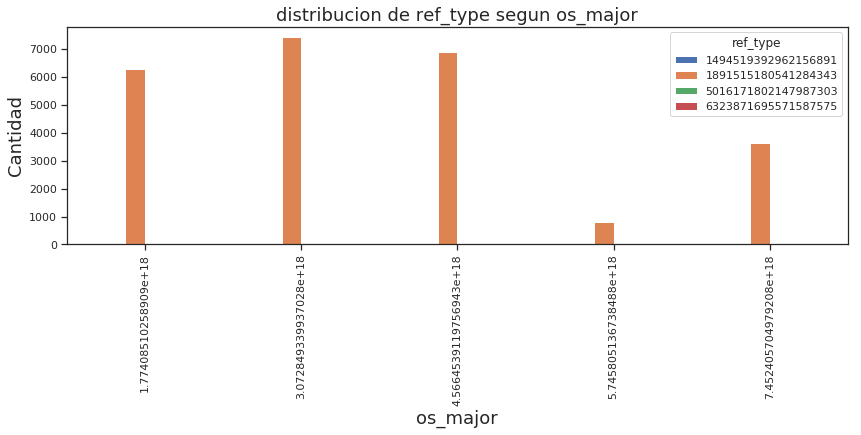

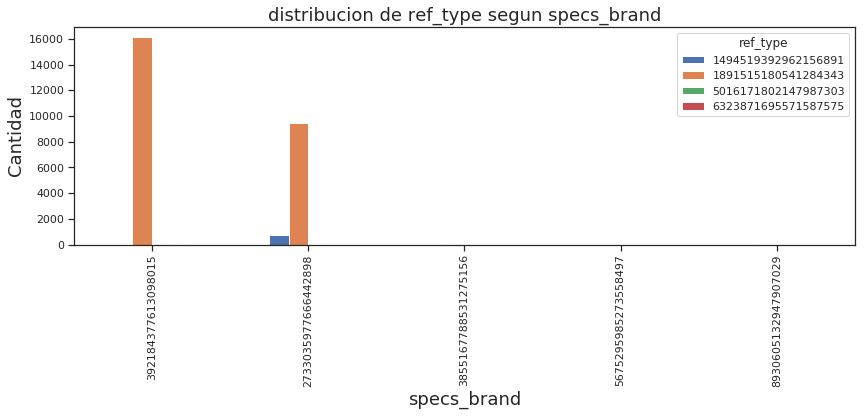

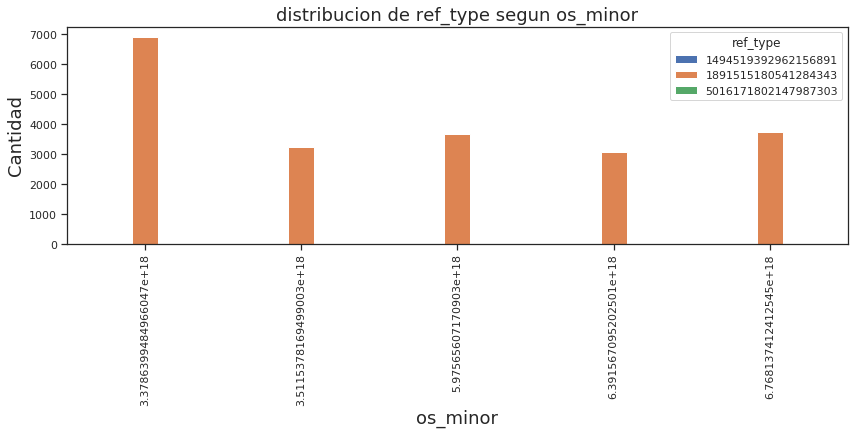

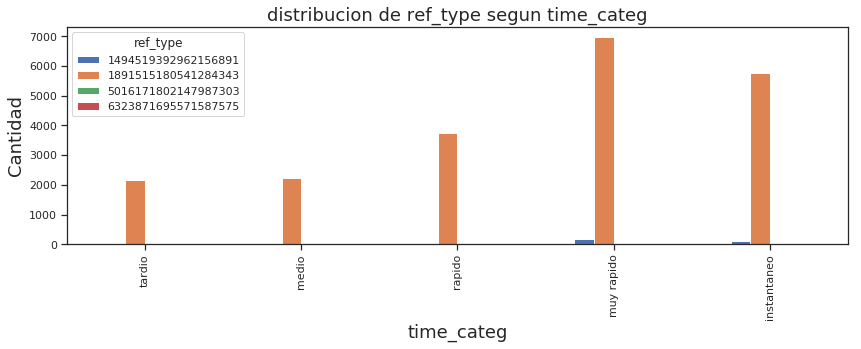

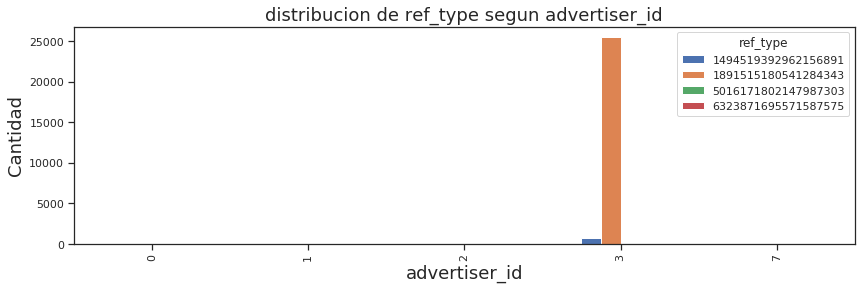

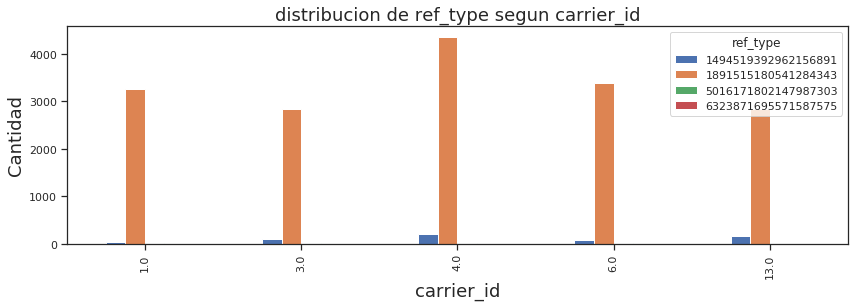

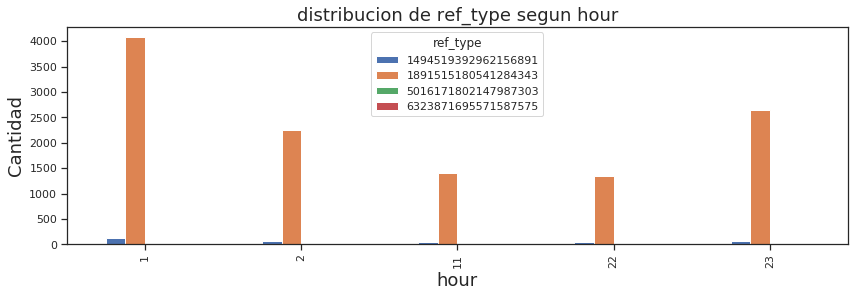

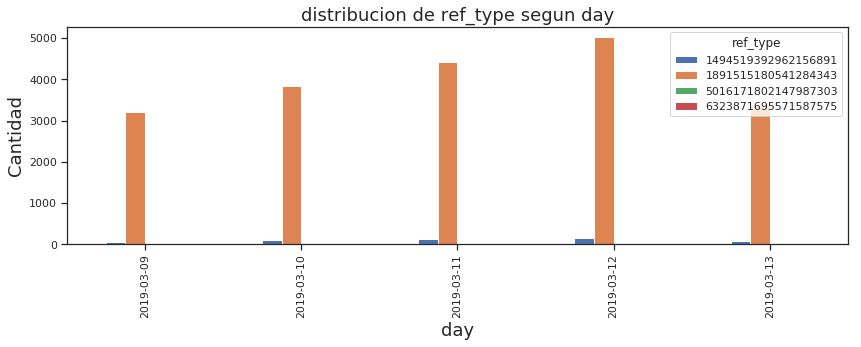

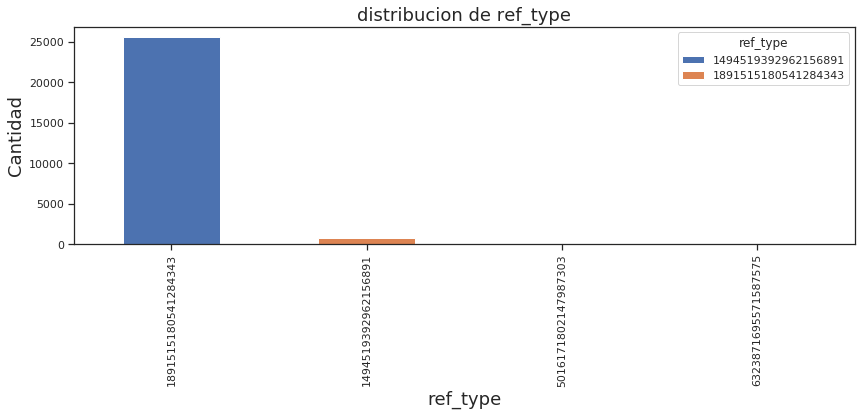

In [21]:
def barplot_simple(i):
    clicks_filtrado = clicks.loc[clicks[i].isin(top5[i])][i]
    if clicks_filtrado.empty:
        print('no pude hacer barplot de' + i)
        return
    plot = clicks_filtrado.value_counts().plot(kind='bar',figsize=(14,4));
    plot.set_title('distribucion de ' + i, fontsize=18)
    plot.set_xlabel(i,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('clicks/top5'+str(i)+'.png', bbox_inches = 'tight')

def barplot_doble(i, j):
    clicks_filtrado = clicks.loc[clicks[i].isin(top5[i])].loc[clicks[j].isin(top5[j])]
    if clicks_filtrado.empty:
        print('no pude hacer barplot de ' + j + ' segun ' + i)
        return
    plot = pd.crosstab(clicks_filtrado[j], clicks_filtrado[i]).plot(kind='bar',figsize=(14,4));
    plot.set_title('distribucion de ' + i + ' segun ' + j, fontsize=18)
    plot.set_xlabel(j,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('clicks/top5'+str(j)+'_segun_top5'+str(i)+'.png', bbox_inches = 'tight')
    
for i in top5.keys():
    for j in top5.keys():
        if i == j:
            barplot_simple(i)
        else:
            barplot_doble(i, j)

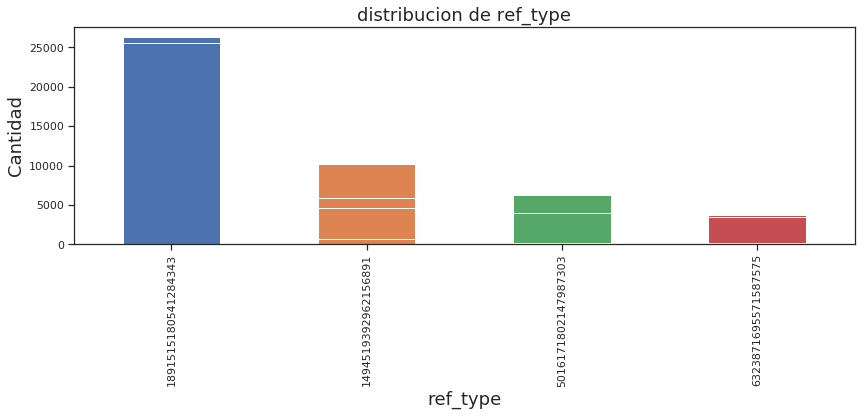

In [22]:
for i in top5.keys():
    barplot_simple(i)

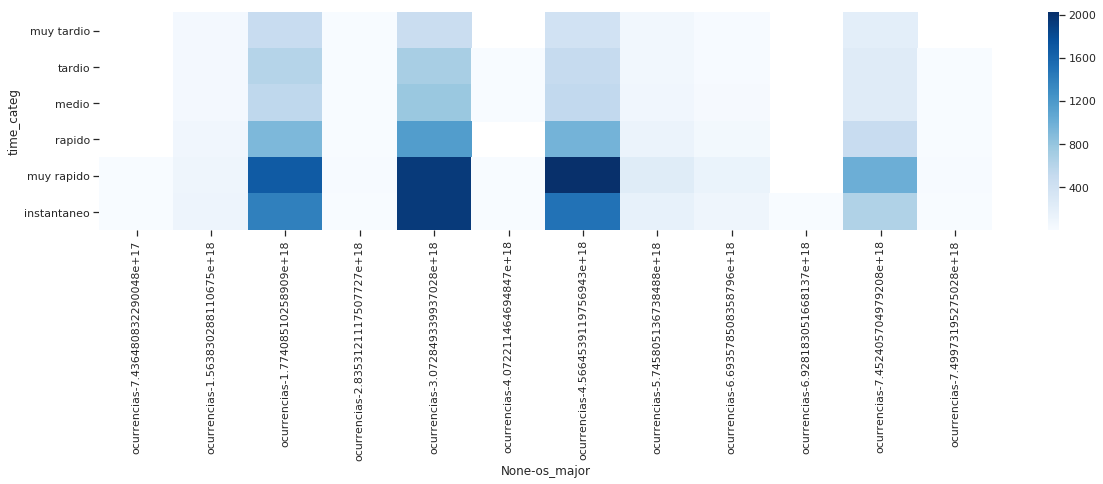

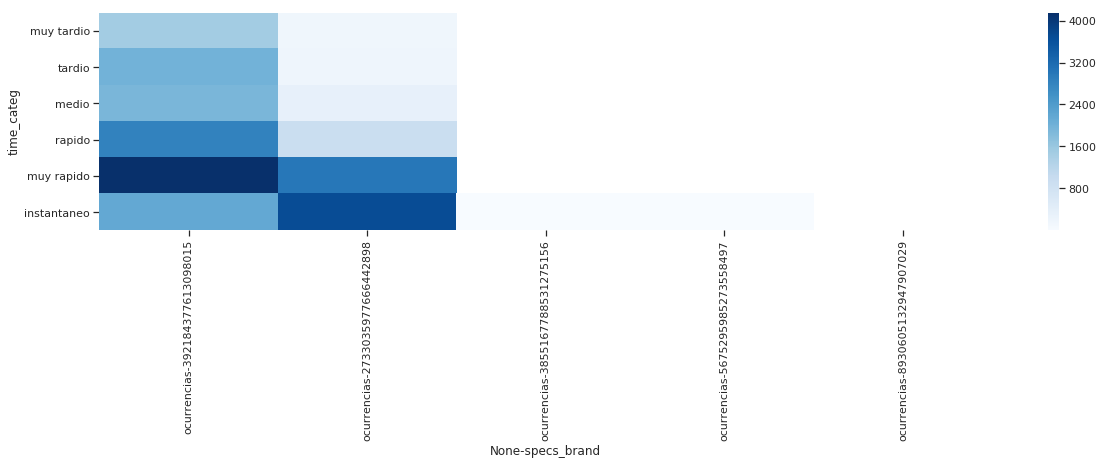

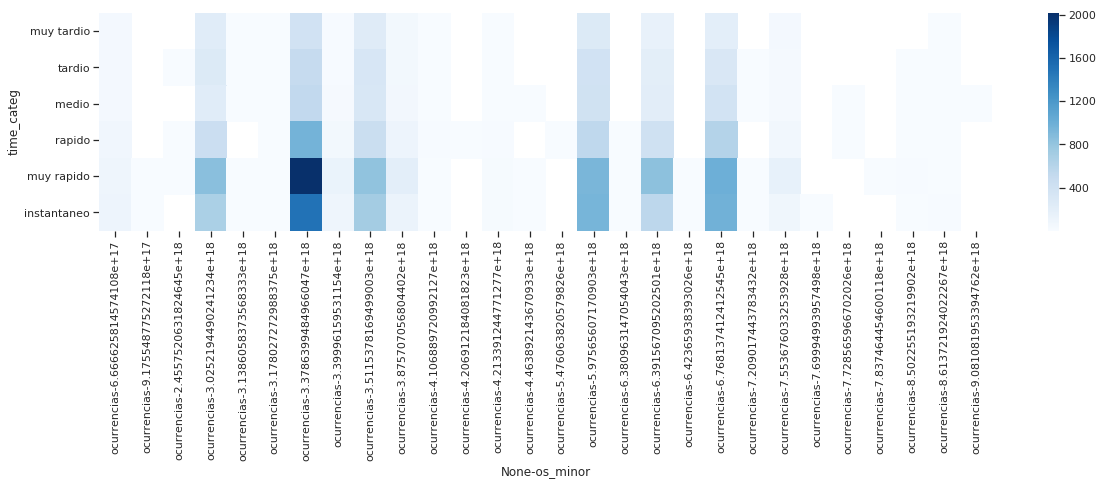

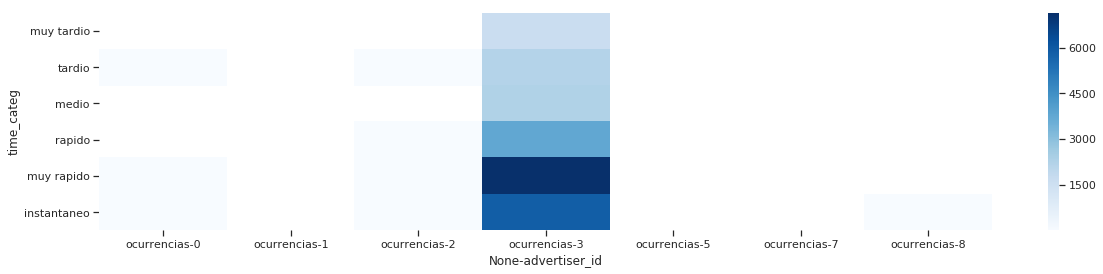

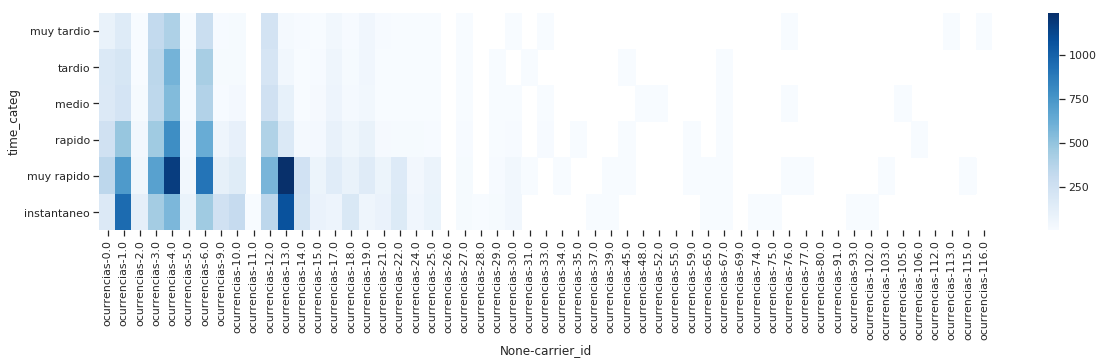

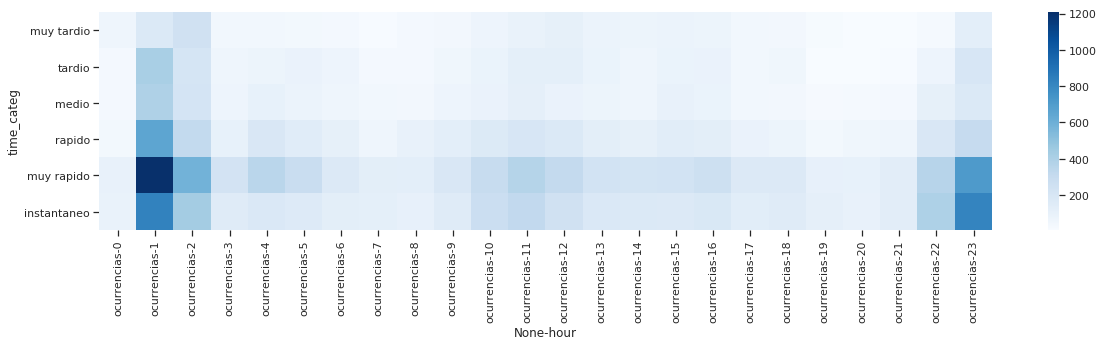

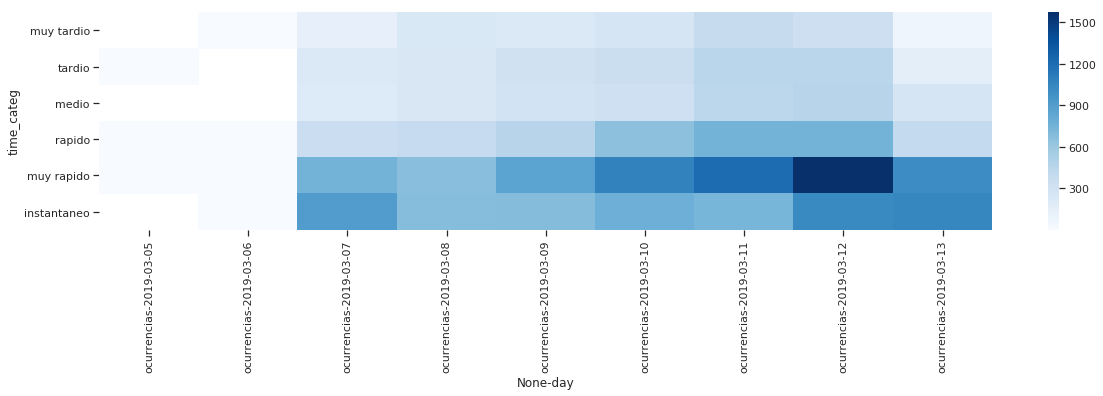

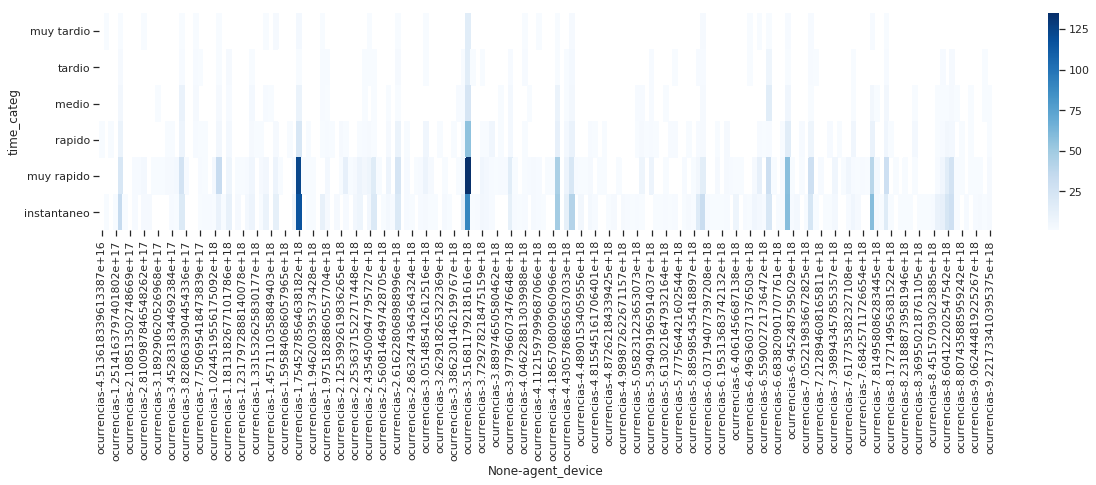

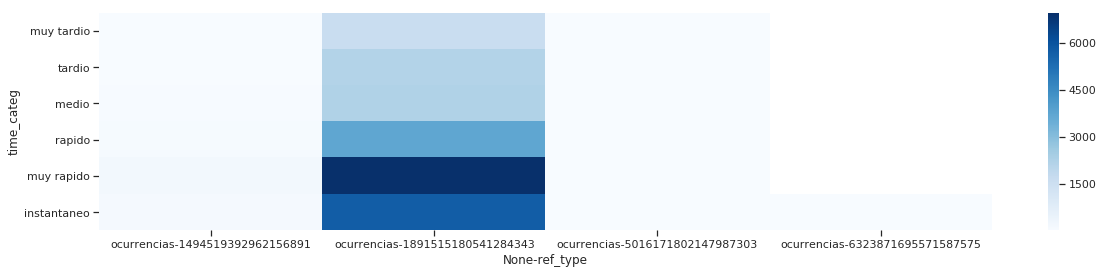

In [40]:
clicks['ocurrencias']= 1

for i in top5.keys():
    if i != 'time_categ':
        matriz = clicks[['time_categ',i, 'ocurrencias']].groupby(['time_categ',i]).count().unstack()
        fig, ax = plt.subplots(figsize=(20,4))
        sns.heatmap(matriz, cmap='Blues', ax = ax)

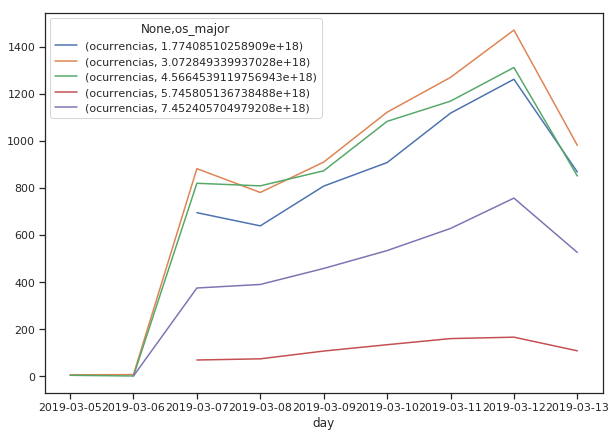

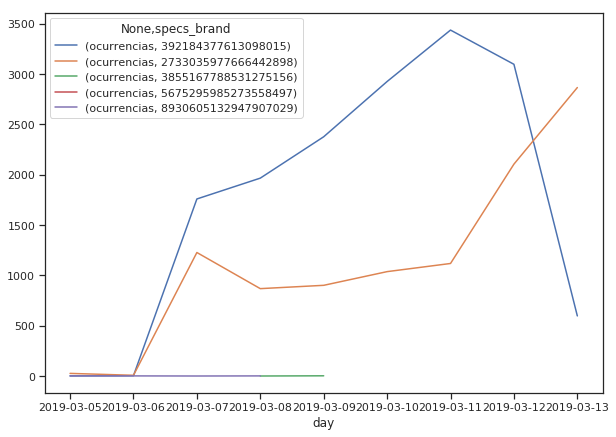

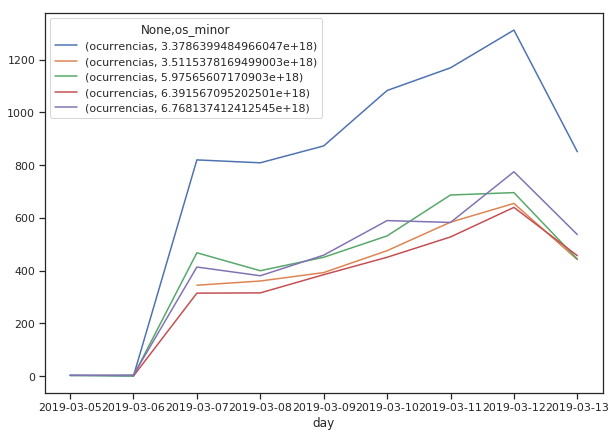

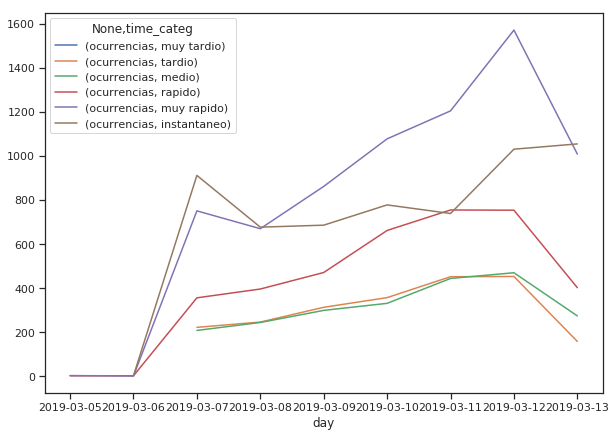

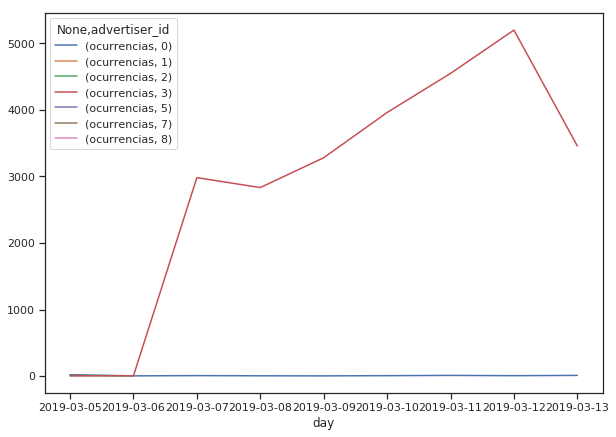

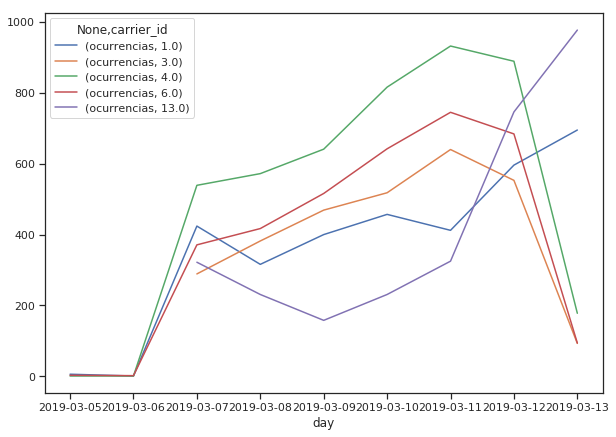

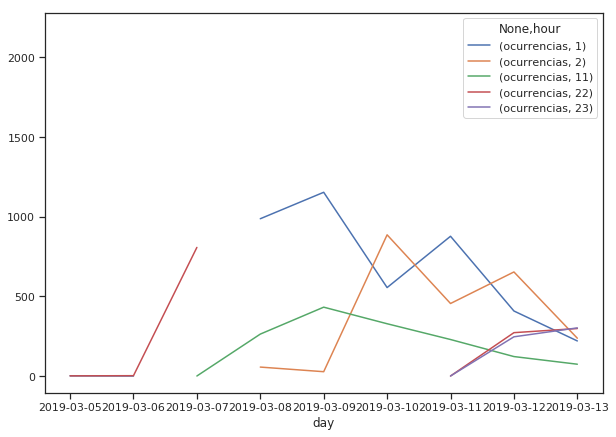

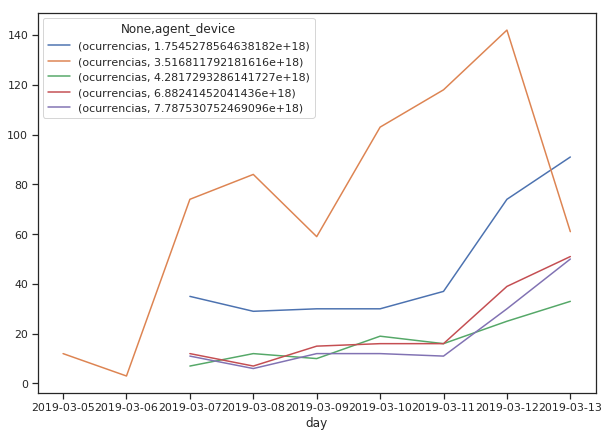

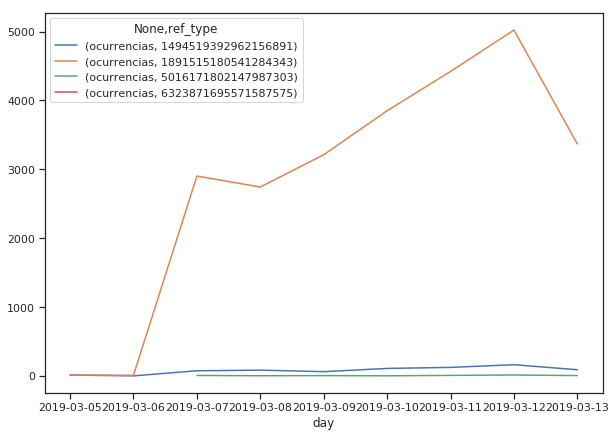

In [41]:
for i in top5.keys():
    if i != 'day':
        clicks.loc[clicks[i].isin(top5[i])][['day',i, 'ocurrencias']].groupby(['day',i]).count().unstack().plot(figsize = (10,7))

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


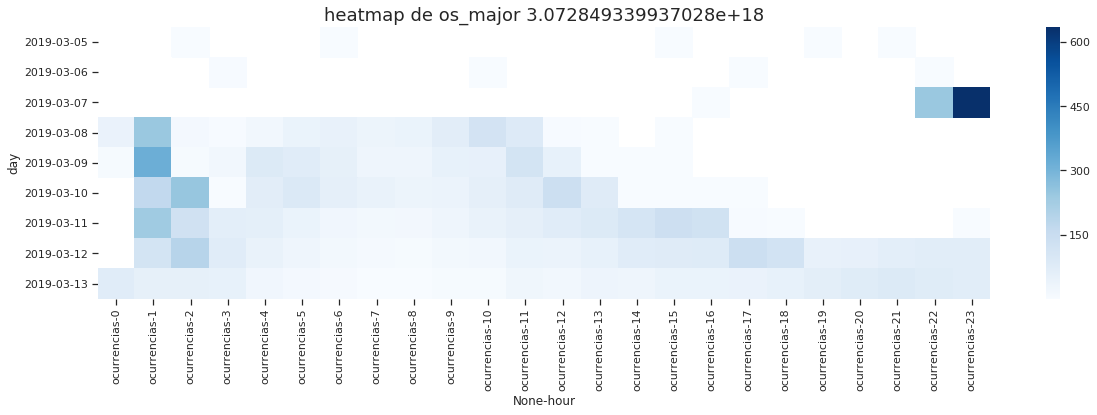

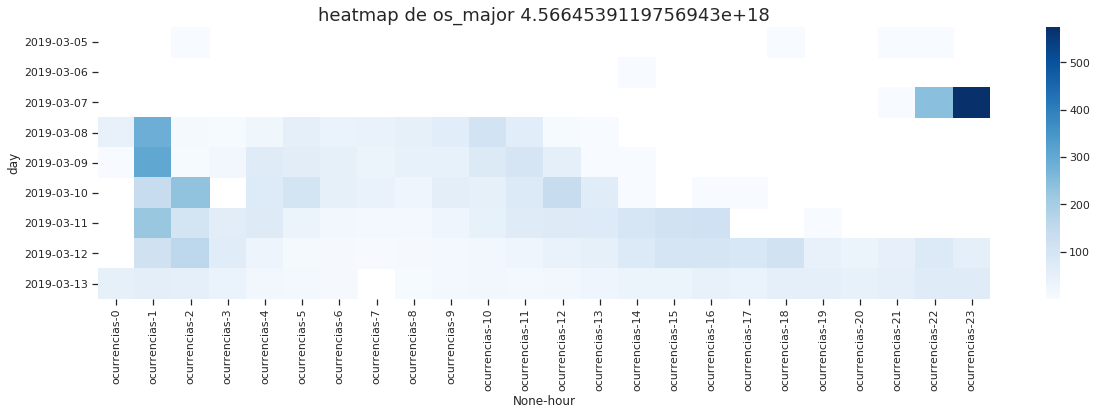

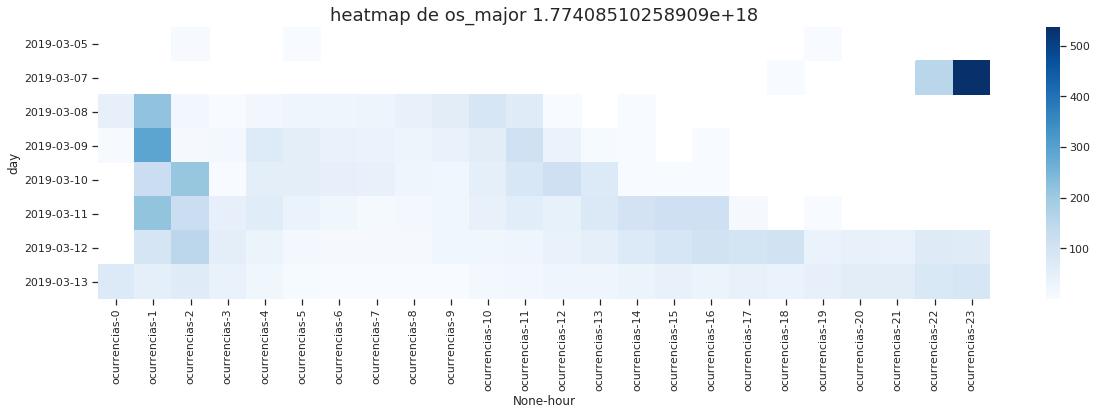

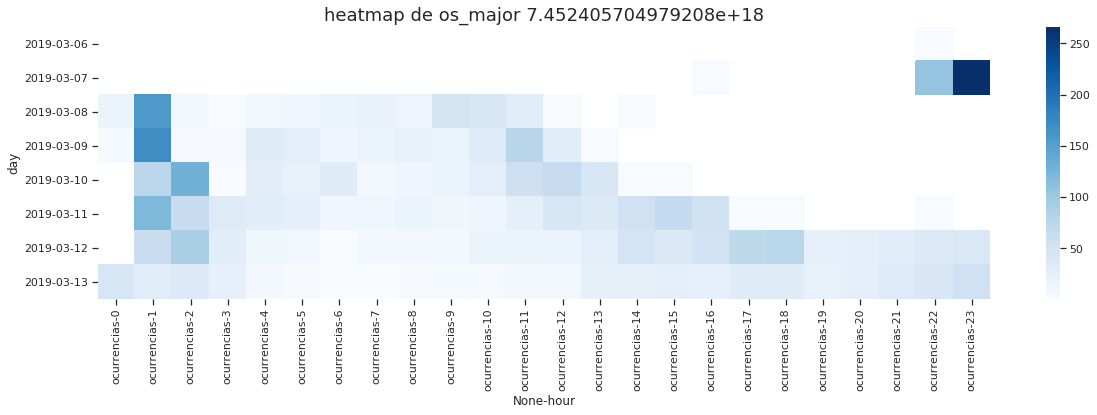

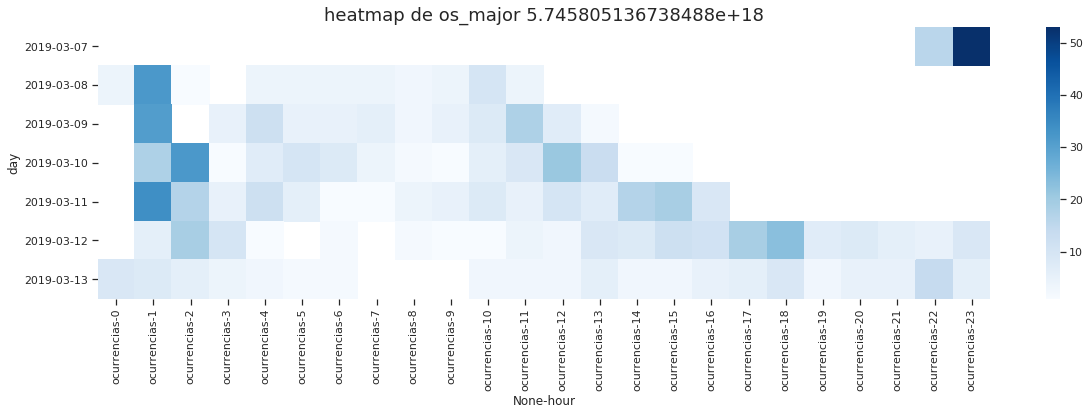

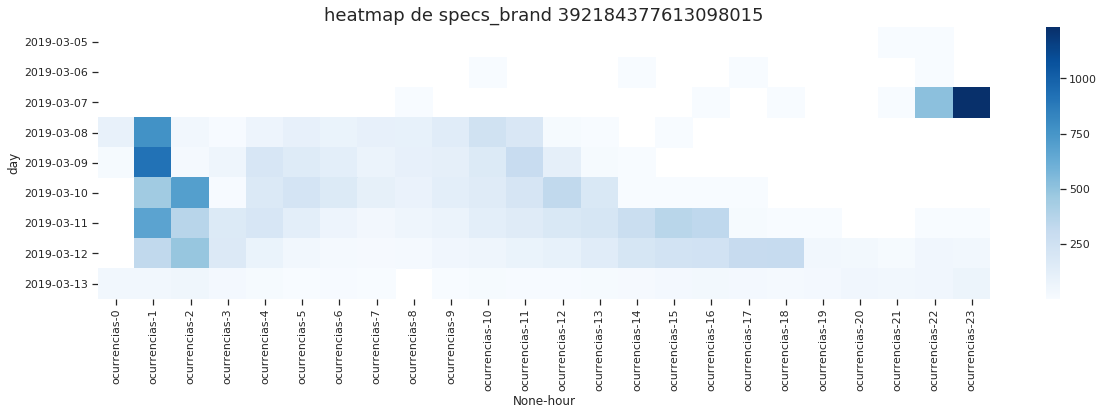

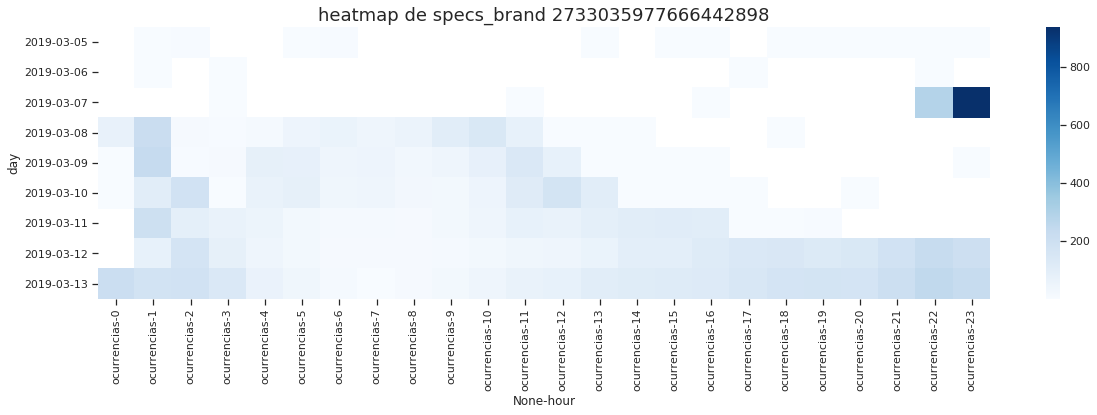

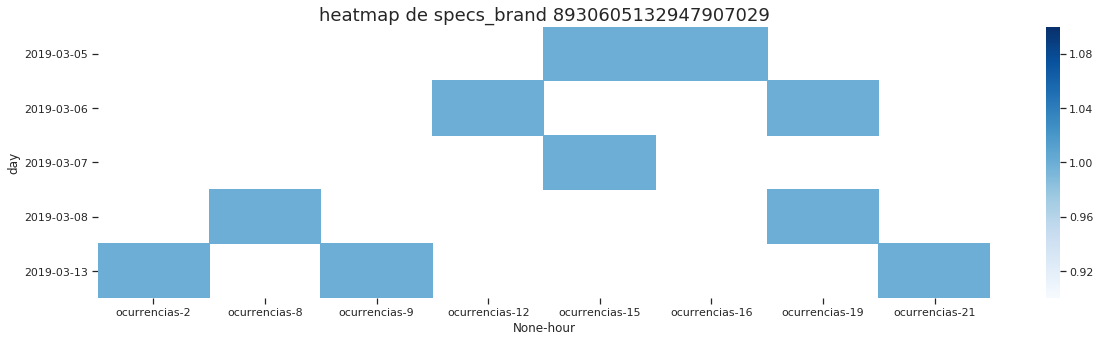

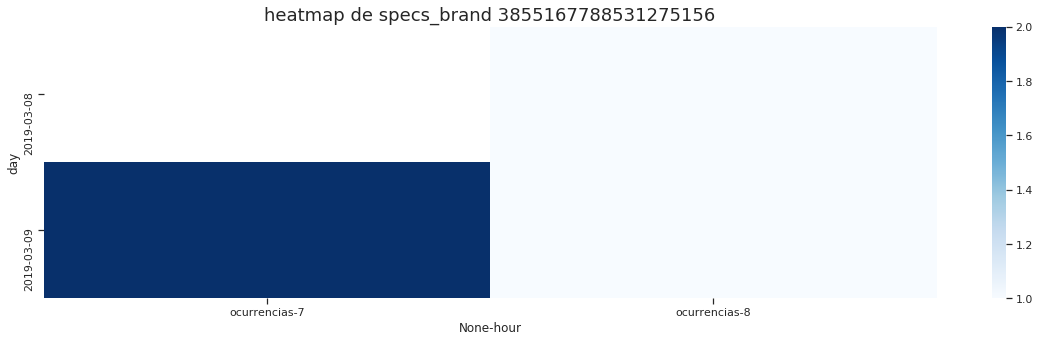

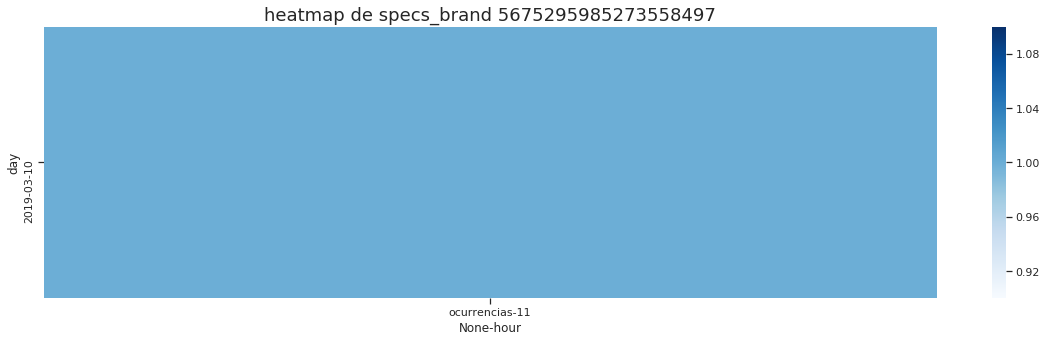

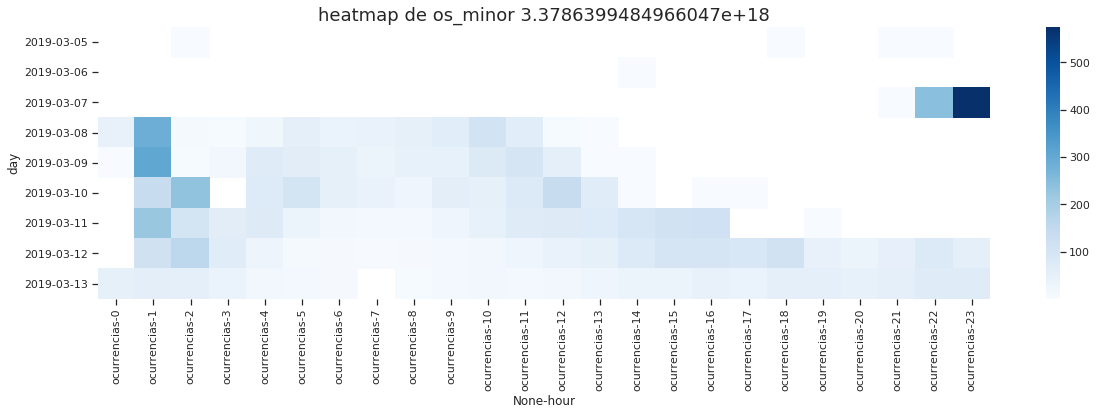

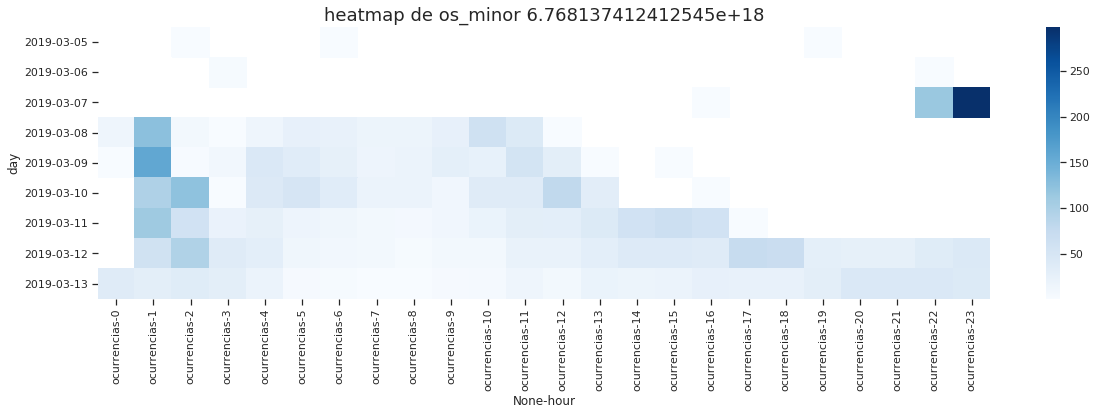

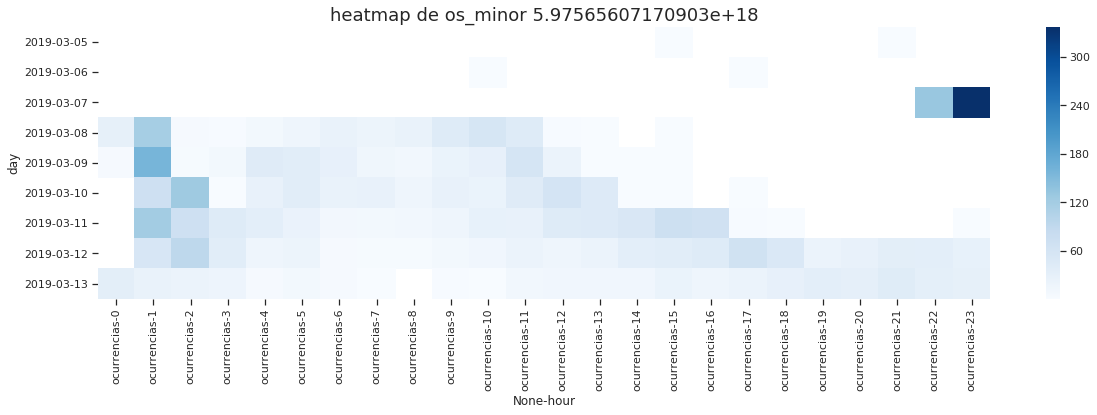

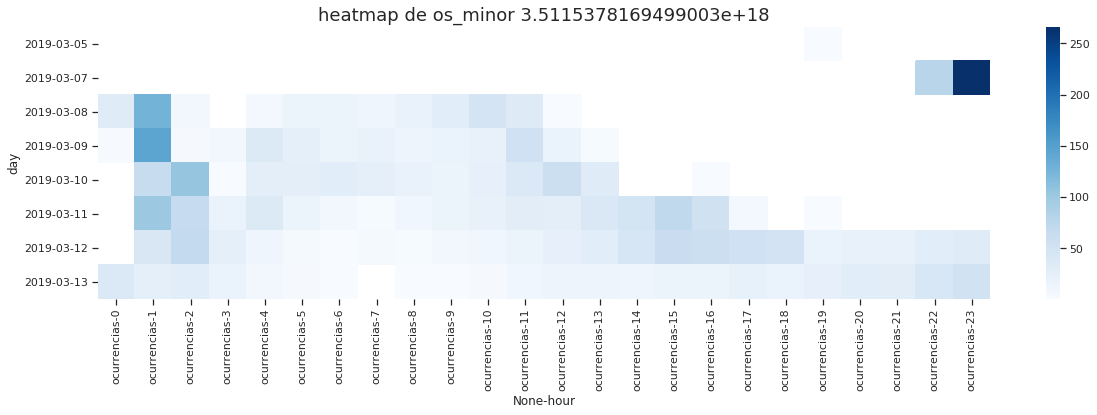

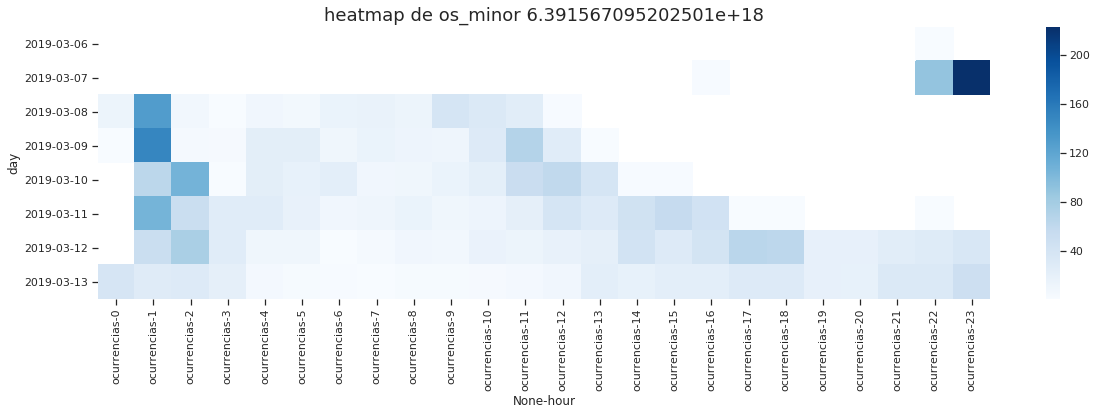

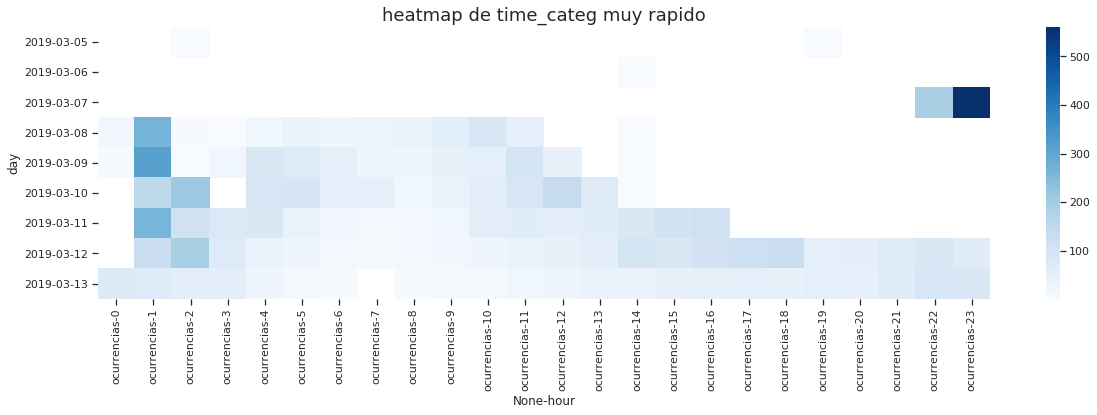

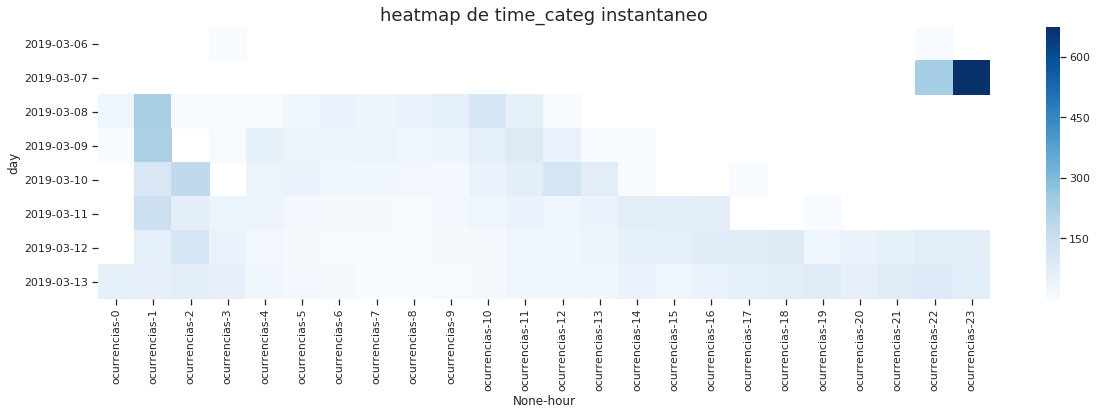

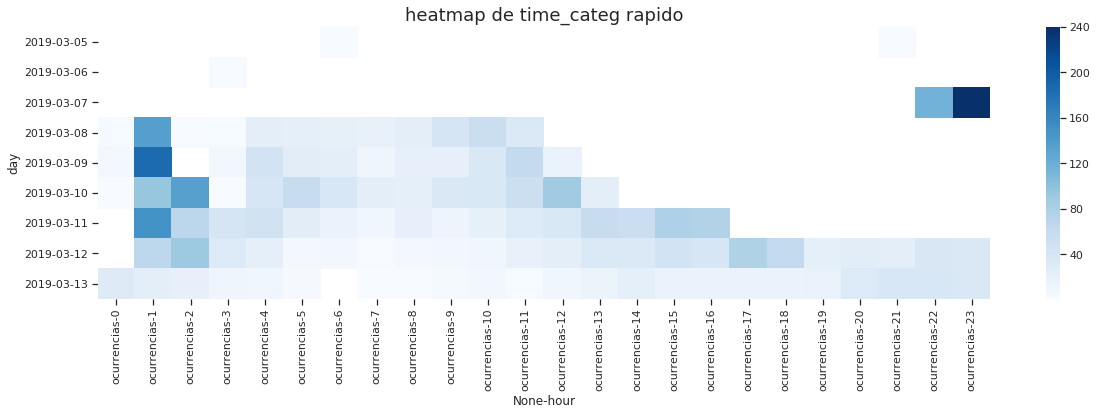

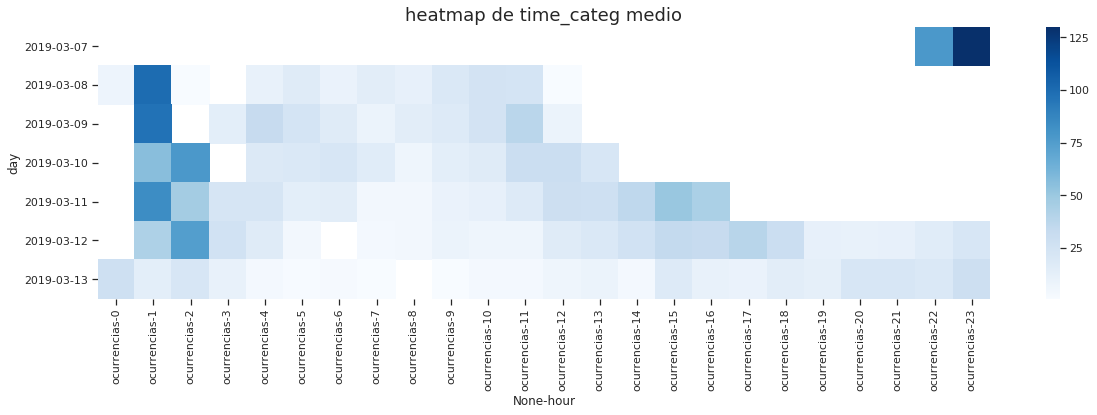

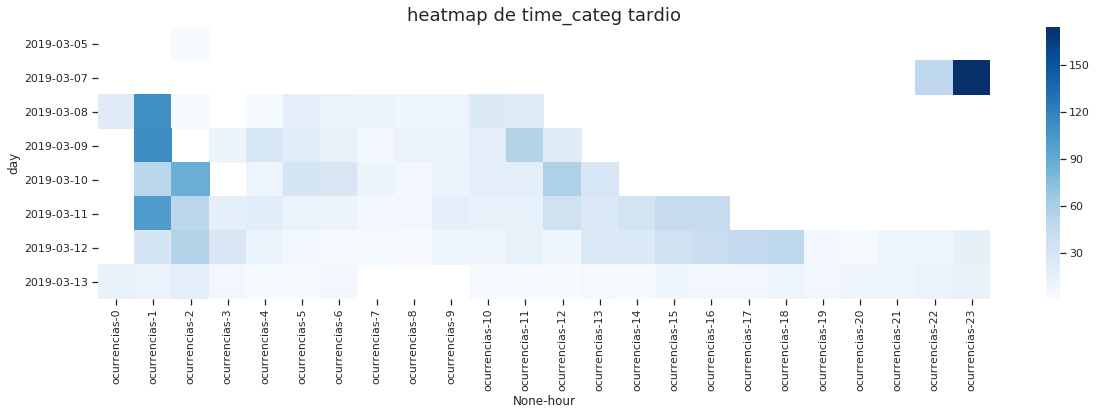

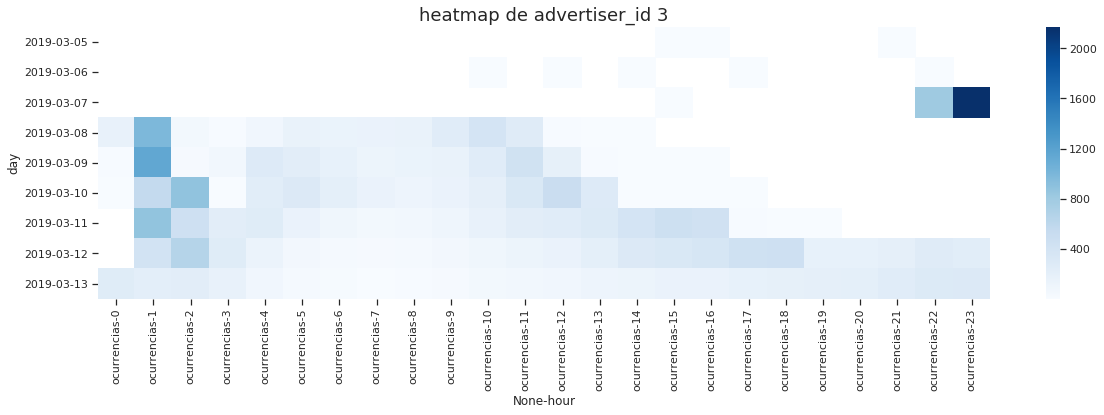

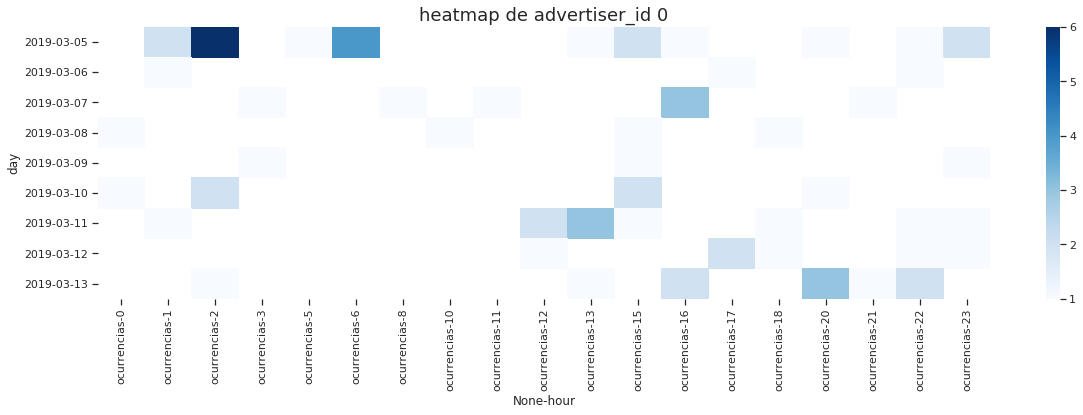

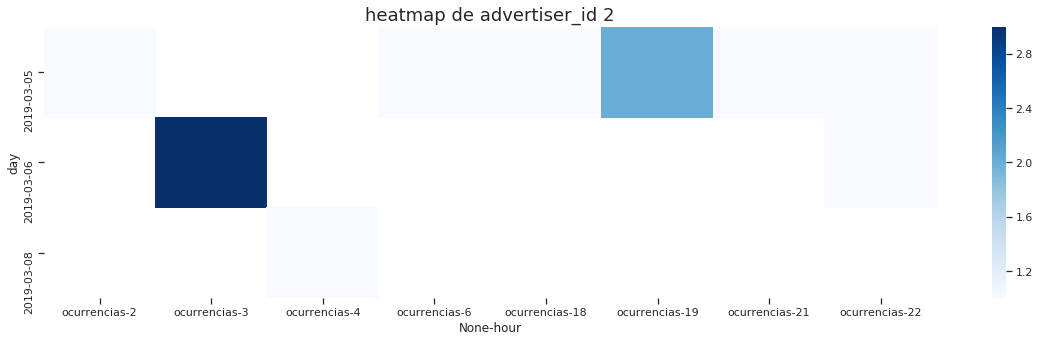

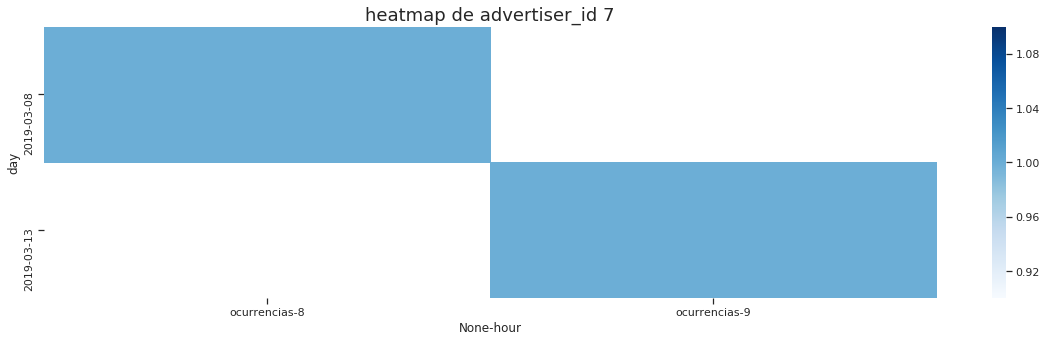

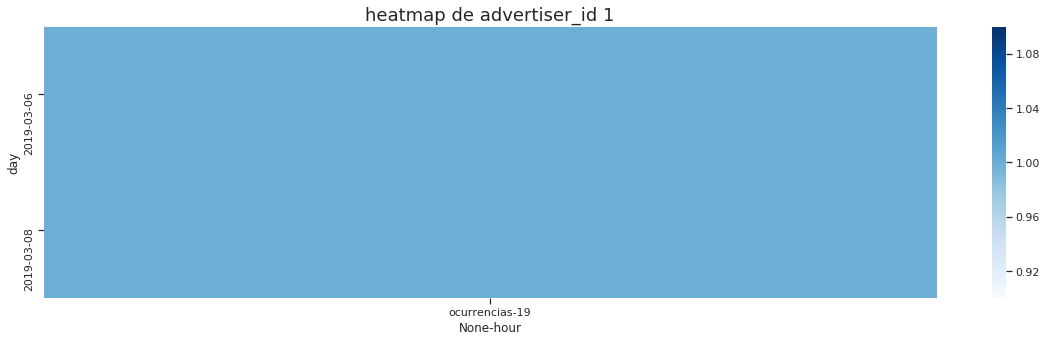

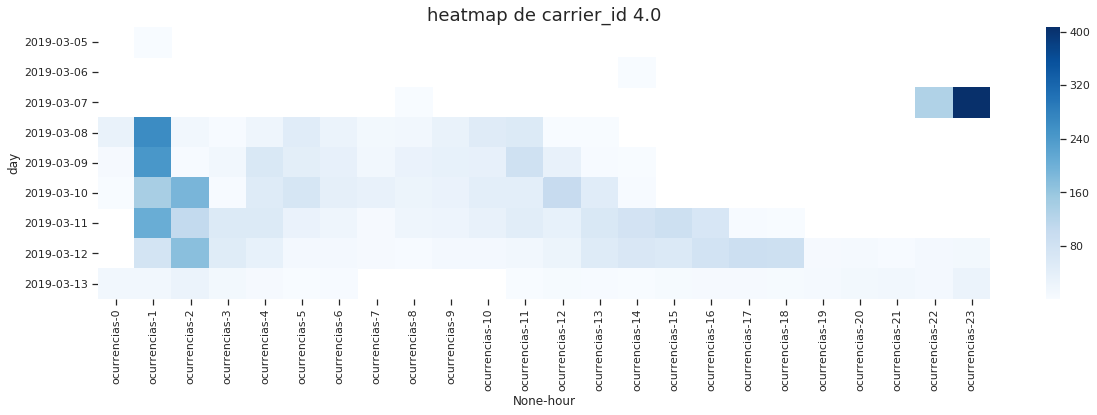

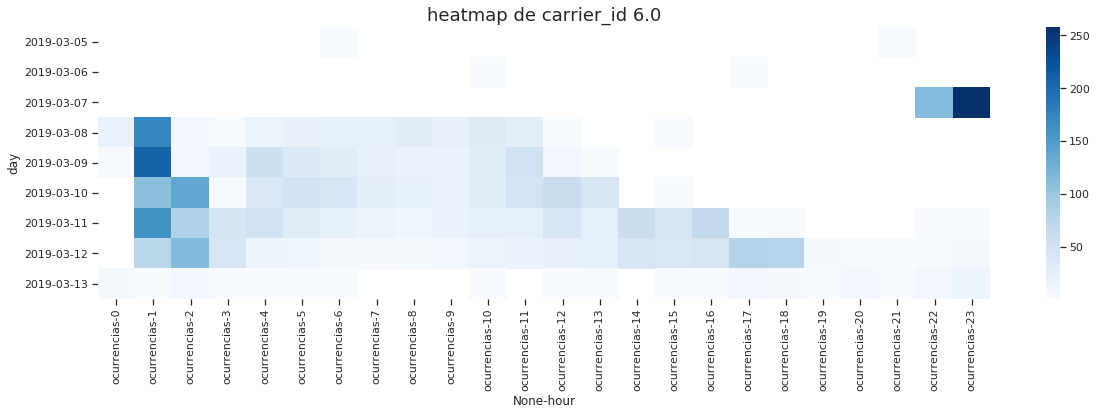

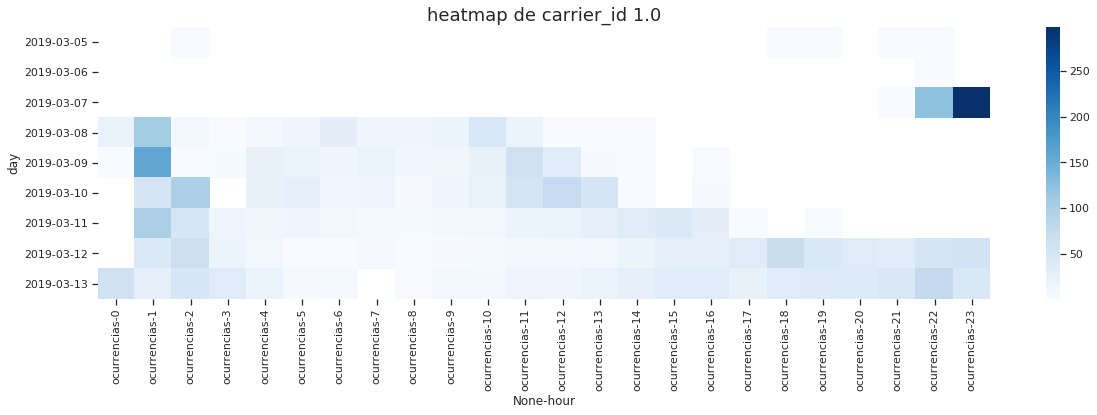

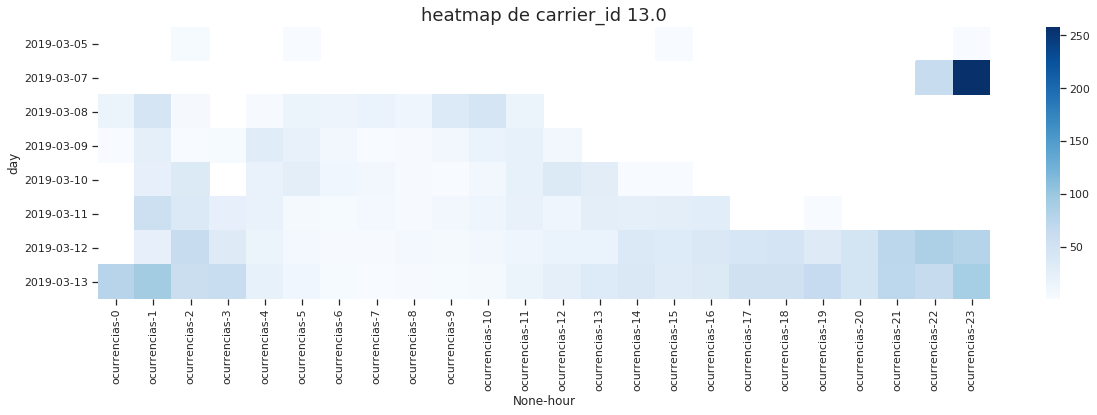

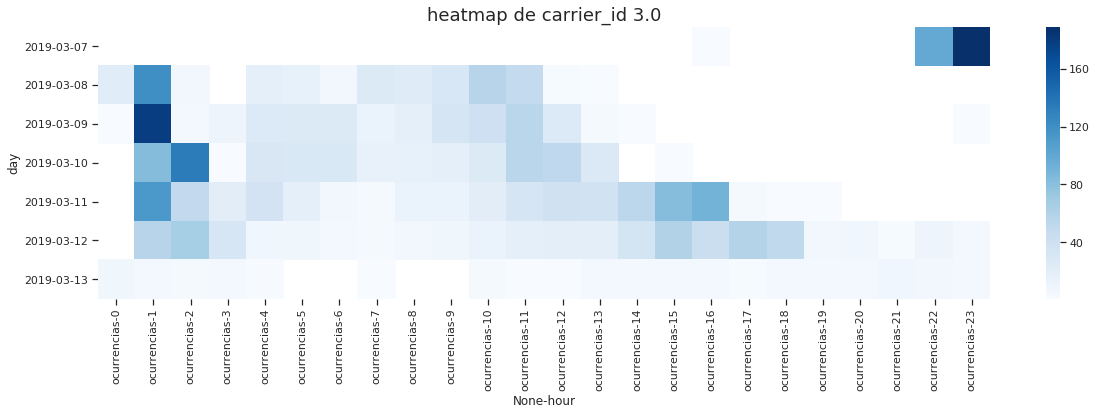

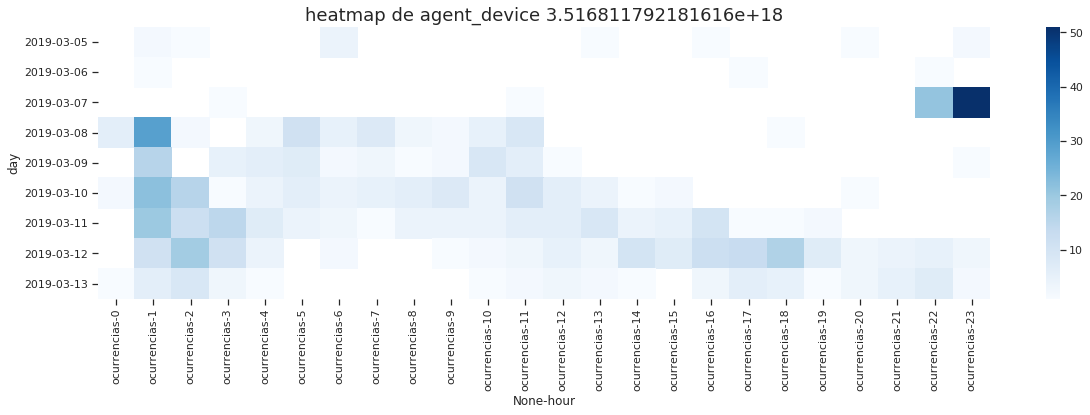

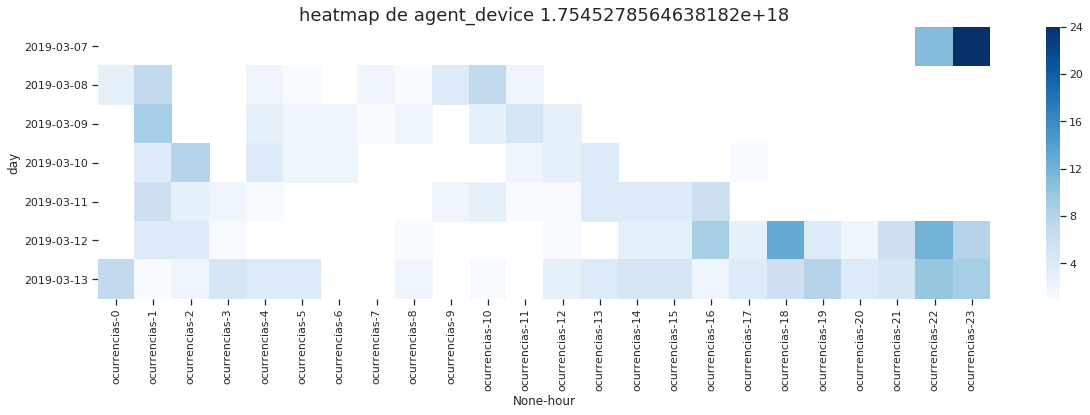

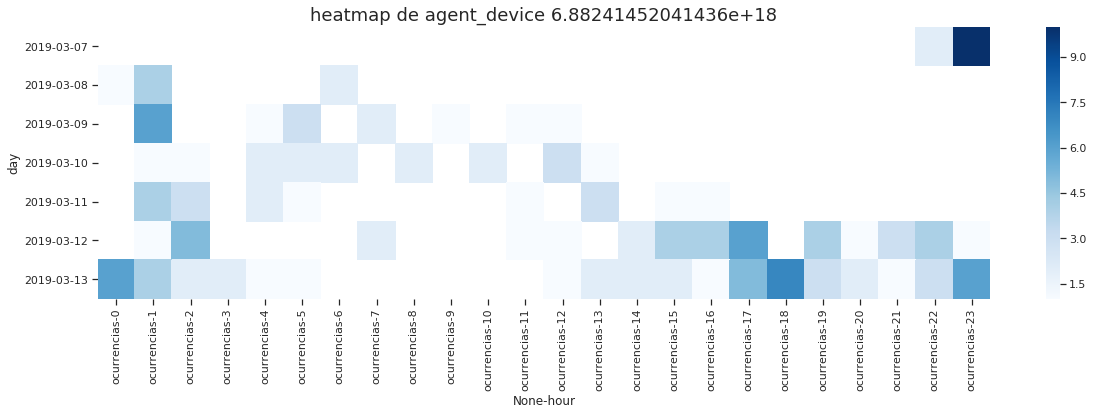

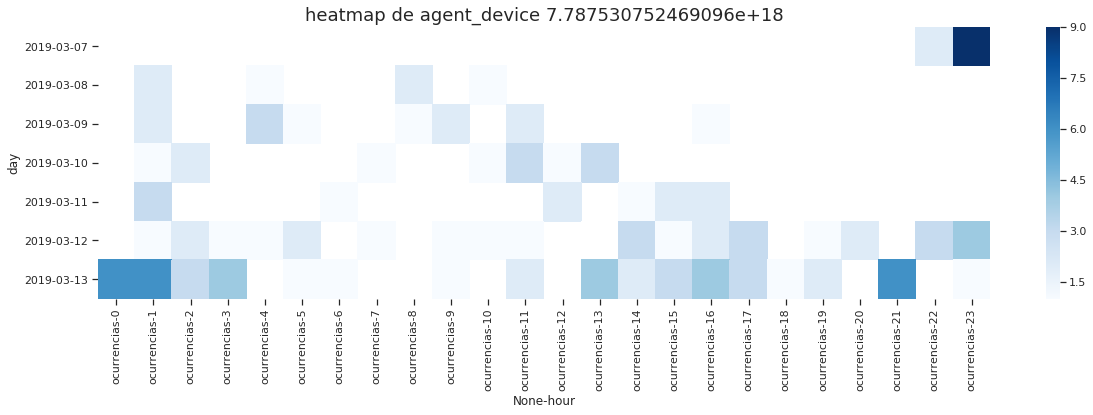

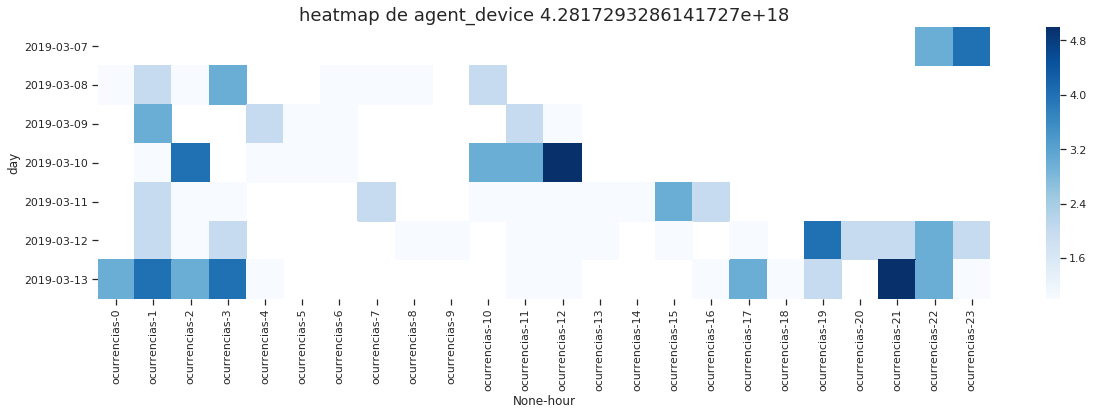

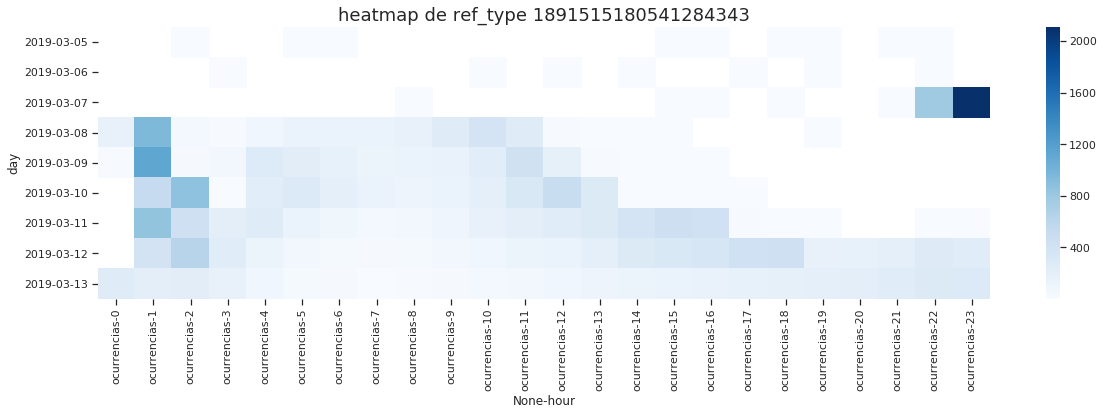

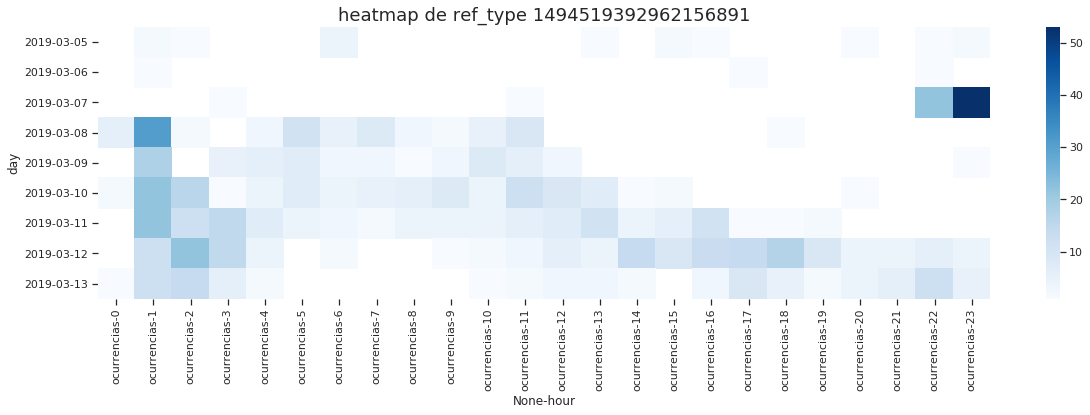

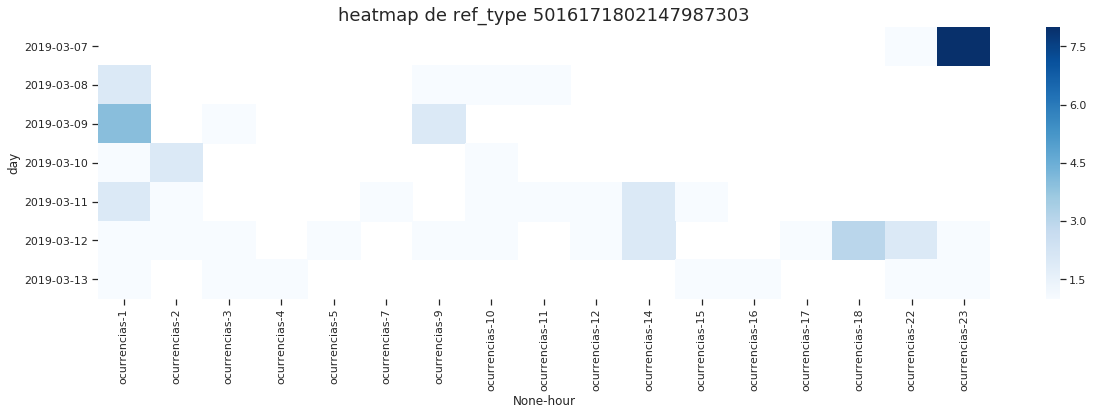

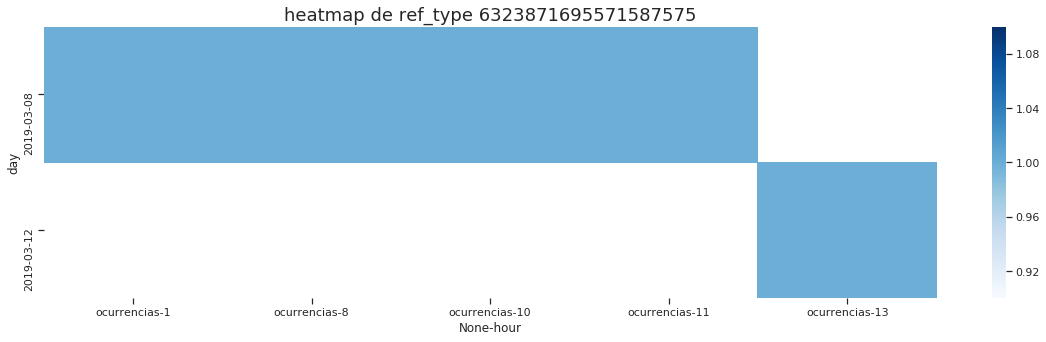

In [42]:
for i in top5.keys():
    for j in top5[i]:
        if i != 'day' and i != 'hour':
            matriz = clicks.loc[clicks[i]==j][['day','hour', 'ocurrencias']].groupby(['day','hour']).count().unstack()
            fig, ax = plt.subplots(figsize=(20,5))
            plt.title('heatmap de ' + str(i) + ' ' + str(j), fontsize = 18)
            sns.heatmap(matriz, cmap='Blues', ax = ax)